# Premier League Analysis: 2020-21 Season

This notebook analyzes the performance of teams and players in the Premier League during the 2020-21 season. It uses data from WyScout, StatsBomb, and FbRef.com to answer questions about the best performers and their defining qualities. The analysis is structured into various parts, each focusing on different aspects of performance.

## Table of Contents
1. Introduction
2. Exploring Key Metrics Defining Team Performance
3. Data Analysis and Visualization
4. Conclusion

## How to Use This Notebook
1. Ensure you have the necessary libraries installed.
2. Run each cell sequentially to reproduce the analysis.
3. Refer to the comments and markdown cells for explanations and context.

# Premier League: Which teams and players performed the best in the 2020-21 Season?

## Introduction

In this project, we will analyze the performance of teams and players in the Premier League 2020-21 season using data from various sources. We aim to identify the best performers and the qualities that set them apart.

The English Premier League is the the first division of football in the English Football System. The competition was founded as the FA Premier League on 20 February 1992 following the decision of clubs in the Football League First Division to break away from the Football League, founded in 1888, and take advantage of a lucrative television rights sale to Sky. Currently, The Premier League is the most-watched sports league in the world, broadcast in 212 territories to 643 million homes and a potential TV audience of 4.7 billion people. Despite its popularity, access to real-time data in the Premier League was difficult before Opta debuted its current real-time data collection process for football matches in 2006, leading to an expansion in new data offerings.For the past 15 years, analytics-driven punditry and performance improvement coaching have grown astronomically. As modern football is a very fast-paced and an end-to-end action sport, it is very difficult to analyze the performance of 22 players from 12 teams in real time. This is where data comes in handy! With statistics and event data, we will look at why some teams and players perform better than others by analyzing different metrics. In the process , we will answer the questions "Which teams and players were the best performers? In what Aspects? Which qualities set them apart from others? in reasonable depth. We will use standard statistics , advanced statistics and event data from WyScout , StatsBomb and FbRef.com in combination to observe these trends.

## Part 1: Exploring Key Metrics Defining Team Performance

In this section, we will delve into various metrics that define team performance. We will use data from WyScout, StatsBomb, and FbRef.com.

### Required Libraries

First, we need to import the necessary libraries for data analysis and visualization.

In [140]:
pip install mplsoccer

Note: you may need to restart the kernel to use updated packages.


In [88]:
import pandas as pd    #display dataframes  # Import necessary libraries
import matplotlib.pyplot as plt  #to make plots  # Import necessary libraries
import numpy as np     #for mathematical computation  # Import necessary libraries
import json            #for processing .json files  # Import necessary libraries
from matplotlib import cm #scalar mappable 
from matplotlib.pyplot import figure #add patches to plots
from FCPython2 import createPitch #Pitch layout for shotmaps(BY friendsoftracking)
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.patheffects as path_effects  # Import necessary libraries
from urllib.request import urlopen #getting data via url request
from PIL import Image   #insert image
from mplsoccer import Pitch, FontManager, add_image, PyPizza #draw pitch compatible with general and specific data

First, we read in a csv file that contains the general statistics for the entirety of the 2020-21 premier league season for all 20 teams that took part as a dataframe.  Below is a glossary of the meanings of all the metrics that are in this dataset.

Age -- Average Age  
Age is weighted by minutes played  
Poss -- Possession  
Calculated as the percentage of passes attempted  
Playing Time  
MP -- Matches Played  
Matches Played by the player or squad  
Starts -- Starts  
Game or games started by player  
Min -- Minutes  
90s -- 90s played  
Minutes played divided by 90  
Performance  
Gls -- Goals  
Goals scored or allowed  
Ast -- Assists  
G-PK -- Non-Penalty Goals  
PK -- Penalty Kicks Made  
PKatt -- Penalty Kicks Attempted  
CrdY -- Yellow Cards  
CrdR -- Red Cards  
Per 90 Minutes  
Gls -- Goals Scored per 90 minutes  
Minimum 30 minutes played per squad game to qualify as a leader  
Ast -- Assists per 90 minutes  
Minimum 30 minutes played per squad game to qualify as a leader  
G+A -- Goals and Assists per 90 minutes  
Minimum 30 minutes played per squad game to qualify as a leader  
G-PK -- Goals minus Penalty Kicks made per 90 minutes  
Minimum 30 minutes played per squad game to qualify as a leader  
G+A-PK -- Goals plus Assists minus Penalty Kicks made per 90 minutes  
Minimum 30 minutes played per squad game to qualify as a leader  
Expected  
xG -- Expected Goals  
xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).  
Provided by StatsBomb.  
An underline indicates there is a match that is missing data, but will be updated when available.  
npxG -- Non-Penalty Expected Goals.  
Provided by StatsBomb.  
An underline indicates there is a match that is missing data, but will be updated when available.  
xA -- xG Assisted  
xG which follows a pass that assists a shot  
Provided by StatsBomb.  
An underline indicates there is a match that is missing data, but will be updated when available.  
npxG+xA -- Non-Penalty Expected Goals plus xG Assisted  
xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).  
Provided by StatsBomb.  
An underline indicates there is a match that is missing data, but will be updated when available.  
Minimum 30 minutes played per squad game to qualify as a leader  
Per 90 Minutes  
xG -- Expected Goals per 90 minutes  
xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).  
Provided by StatsBomb.  
An underline indicates there is a match that is missing data, but will be updated when available.  
Minimum 30 minutes played per squad game to qualify as a leader  
xA -- xG Assisted per 90 minutes  
Provided by StatsBomb.  
An underline indicates there is a match that is missing data, but will be updated when available.  
Minimum 30 minutes played per squad game to qualify as a leader  
xG+xA -- Expected Goals plus Assist per 90 minutes  
xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).  
Provided by StatsBomb.  
An underline indicates there is a match that is missing data, but will be updated when available.  
Minimum 30 minutes played per squad game to qualify as a leader  
npxG -- Non-Penalty Expected Goals per 90 minutes  
Provided by StatsBomb.  
An underline indicates there is a match that is missing data, but will be updated when available.  
Minimum 30 minutes played per squad game to qualify as a leader  
npxG+xA -- Non-Penalty Expected Goals plus xG Assisted per 90 minutes  
Provided by StatsBomb.  
An underline indicates there is a match that is missing data, but will be updated when available.  
Minimum 30 minutes played per squad game to qualify as a leader  

Every year in the Premier League, 20 teams participate. Due to the pyramid tier system of English football, a number of teams get relegated and promoted every season. For the 20202/21 season, Leeds United, West Brom and Fulham were newly promoted. We read in a json file to have a look at all the 20 participant teams in the league.

In [17]:
jsonFile = open("pl.json", "r") #read in json file for PL teams
a = json.load(jsonFile)
jsonFile.close()

In [18]:
lod = []      
            
for i in range(len(a['clubs'])):  #loop through the file to make it readable as a dataframe         
    rowdict = {}                  # consturct lod row to go into lod structure 
    rowdict["code"] = a['clubs'][i]["code"]   
    rowdict["name"] = a['clubs'][i]["name"]
    rowdict["country"] = a['clubs'][i]["country"]
    lod.append(rowdict)                         # add row to lod 
PLdataframe = pd.DataFrame(lod)
sortedPLdataframe= PLdataframe.sort_values("name").sort_values("code")
sortedPLdataframe.set_index(pd.Index(range(len(PLdataframe))))

code                        name  country
0   ARS                  Arsenal FC  England
1   AVL              Aston Villa FC  England
2   BHA   Brighton & Hove Albion FC  England
3   BUR                  Burnley FC  England
4   CHE                  Chelsea FC  England
5   CRY           Crystal Palace FC  England
6   EVE                  Everton FC  England
7   FUL                   Fulham FC  England
8   LEE             Leeds United FC  England
9   LEI           Leicester City FC  England
10  LIV                Liverpool FC  England
11  MCI          Manchester City FC  England
12  MUN        Manchester United FC  England
13  NEW         Newcastle United FC  England
14  SHU         Sheffield United FC  England
15  SOU              Southampton FC  England
16  TOT        Tottenham Hotspur FC  England
17  WBA     West Bromwich Albion FC  England
18  WHU          West Ham United FC  England
19  WOL  Wolverhampton Wanderers FC  England

The premier league takes place in a home and away format. Every team faces every other team once home and once away. This makes a total of 380 games. The final positions of Premier League teams are determined first by Points accumulated, then if teams have equal teams the next metric to be evaluated is Head to head. We read in a json file containing all the games by gameweek and make a table to look at the results to aid our later understanding of positions in the table.

In [19]:
jsonFile = open("plResults.json", "r")
a = json.load(jsonFile)
jsonFile.close()

In [20]:
plResults = []
for i in range(len(a["matches"])):
    rowdict = {}
    rowdict["Round"] = a['matches'][i]['round'] 
    rowdict["Date"] = a['matches'][i]['date'] 
    rowdict["Team 1"] = a['matches'][i]['team1']
    rowdict["Team 2"] = a["matches"][i]["team2"]
    y = tuple(a["matches"][i].keys())
    if "score" in y:
        rowdict["Team 1 Score"] = str(a["matches"][i]["score"]['ft'][0])
        rowdict["Team 2 Score"] = str(a["matches"][i]["score"]['ft'][1])
    plResults.append(rowdict)

In [21]:
PLdataframe = pd.DataFrame(plResults)
PLdataframe.head(80)

Round        Date                      Team 1  \
0   Matchday 1  2020-09-12                  Burnley FC   
1   Matchday 1  2020-09-12          Manchester City FC   
2   Matchday 1  2020-09-12                   Fulham FC   
3   Matchday 1  2020-09-12           Crystal Palace FC   
4   Matchday 1  2020-09-12                Liverpool FC   
5   Matchday 1  2020-09-12          West Ham United FC   
6   Matchday 1  2020-09-13     West Bromwich Albion FC   
7   Matchday 1  2020-09-13        Tottenham Hotspur FC   
8   Matchday 1  2020-09-14         Sheffield United FC   
9   Matchday 1  2020-09-14   Brighton & Hove Albion FC   
10  Matchday 2  2020-09-19                  Everton FC   
11  Matchday 2  2020-09-19             Leeds United FC   
12  Matchday 2  2020-09-19        Manchester United FC   
13  Matchday 2  2020-09-19                  Arsenal FC   
14  Matchday 2  2020-09-20              Southampton FC   
15  Matchday 2  2020-09-20         Newcastle United FC   
16  Matchday 2  2020-09-20                  Chelsea FC   
17  Matchday 2  2020-09-20           Leicester City FC   
18  Matchday 2  2020-09-21              Aston Villa FC   
19  Matchday 2  2020-09-21  Wolverhampton Wanderers FC   
20  Matchday 3  2020-09-26   Brighton & Hove Albion FC   
21  Matchday 3  2020-09-26           Crystal Palace FC   
22  Matchday 3  2020-09-26     West Bromwich Albion FC   
23  Matchday 3  2020-09-26                  Burnley FC   
24  Matchday 3  2020-09-27         Sheffield United FC   
25  Matchday 3  2020-09-27        Tottenham Hotspur FC   
26  Matchday 3  2020-09-27          Manchester City FC   
27  Matchday 3  2020-09-27          West Ham United FC   
28  Matchday 3  2020-09-28                   Fulham FC   
29  Matchday 3  2020-09-28                Liverpool FC   
30  Matchday 4  2020-10-03                  Chelsea FC   
31  Matchday 4  2020-10-03                  Everton FC   
32  Matchday 4  2020-10-03             Leeds United FC   
33  Matchday 4  2020-10-03         Newcastle United FC   
34  Matchday 4  2020-10-04           Leicester City FC   
35  Matchday 4  2020-10-04              Southampton FC   
36  Matchday 4  2020-10-04                  Arsenal FC   
37  Matchday 4  2020-10-04  Wolverhampton Wanderers FC   
38  Matchday 4  2020-10-04        Manchester United FC   
39  Matchday 4  2020-10-04              Aston Villa FC   
40  Matchday 5  2020-10-17                  Everton FC   
41  Matchday 5  2020-10-17                  Chelsea FC   
42  Matchday 5  2020-10-17          Manchester City FC   
43  Matchday 5  2020-10-17         Newcastle United FC   
44  Matchday 5  2020-10-18         Sheffield United FC   
45  Matchday 5  2020-10-18           Crystal Palace FC   
46  Matchday 5  2020-10-18        Tottenham Hotspur FC   
47  Matchday 5  2020-10-18           Leicester City FC   
48  Matchday 5  2020-10-19     West Bromwich Albion FC   
49  Matchday 5  2020-10-19             Leeds United FC   
50  Matchday 6  2020-10-23              Aston Villa FC   
51  Matchday 6  2020-10-24          West Ham United FC   
52  Matchday 6  2020-10-24                   Fulham FC   
53  Matchday 6  2020-10-24        Manchester United FC   
54  Matchday 6  2020-10-24                Liverpool FC   
55  Matchday 6  2020-10-25              Southampton FC   
56  Matchday 6  2020-10-25  Wolverhampton Wanderers FC   
57  Matchday 6  2020-10-25                  Arsenal FC   
58  Matchday 6  2020-10-26   Brighton & Hove Albion FC   
59  Matchday 6  2020-10-26                  Burnley FC   
60  Matchday 7  2020-10-30  Wolverhampton Wanderers FC   
61  Matchday 7  2020-10-31         Sheffield United FC   
62  Matchday 7  2020-10-31                  Burnley FC   
63  Matchday 7  2020-10-31                Liverpool FC   
64  Matchday 7  2020-11-01              Aston Villa FC   
65  Matchday 7  2020-11-01         Newcastle United FC   
66  Matchday 7  2020-11-01        Manchester United FC   
67  Matchday 7  2020-11-01        Tottenham Hotspur FC   
68  Mat

Since the results dataset was collected during matchweek nine , it has null values for games after gameweek9.

## 1.1 Ball Possession: How does it relate to team success in the Premier League?

One of the first statistics we look at when we analyze football teams and football game is possession. When a team controls the football, they are on offense and have possession of the ball. If a player goes to pass to a teammate and the other team intercepts it, the other team has now gained possession. Possession is calculated in the following way:
During the game, the passes for each team are totalled up and then each team's total is divided by the game total to produce a percentage figure which shows the percentage of the game that each team has accrued in possession of the ball. Even though possession statistics are dependent on a team's style of play, a key factor in better performances for a team is more possession of the ball. In the below graph, we plot the average possession stats for every team in the Premier League in the 2020-21 season. For this purpose, we use a general statistics dataset scraped from FBref.com.

In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
PL202021df = pd.read_csv("Premier League General 2020-21 - Sheet1.csv")  # Read data into DataFrame
PL202021df

Squad  # Pl   Age  Poss  MP  Starts   Min  90s  Gls  Ast  G-PK  \
0           Arsenal    29  25.9  53.8  38     418  3420   38   53   38    47   
1       Aston Villa    24  25.2  48.1  38     418  3420   38   52   38    47   
2          Brighton    27  25.8  51.3  38     418  3420   38   39   24    33   
3           Burnley    25  28.3  41.7  38     418  3420   38   32   20    29   
4           Chelsea    27  26.0  61.4  38     418  3420   38   56   38    48   
5    Crystal Palace    24  29.1  40.1  38     418  3420   38   39   29    36   
6           Everton    29  26.3  46.5  38     418  3420   38   45   32    41   
7            Fulham    28  25.2  49.9  38     418  3420   38   26   18    23   
8      Leeds United    23  26.1  57.6  38     418  3420   38   60   45    56   
9    Leicester City    27  26.5  54.6  38     418  3420   38   64   45    54   
10        Liverpool    28  26.8  62.4  38     418  3420   38   65   43    59   
11  Manchester City    24  26.1  63.9  38     418  3420   38   82   55    77   
12   Manchester Utd    29  25.6  55.8  38     418  3420   38   70   51    60   
13    Newcastle Utd    27  27.1  38.2  38     418  3420   38   44   26    38   
14    Sheffield Utd    27  26.7  41.5  38     418  3420   38   19   13    16   
15      Southampton    29  26.6  52.2  38     418  3420   38   47   33    42   
16        Tottenham    24  27.2  51.7  38     418  3420   38   66   50    61   
17        West Brom    30  26.4  37.6  38     418  3420   38   33   20    29   
18         West Ham    24  27.8  42.9  38     418  3420   38   60   46    58   
19           Wolves    27  26.3  49.3  38     418  3420   38   34   21    30   

    PK  PKatt  CrdY  CrdR  Gls P90  Asst P90  G=A P90  G-PK P90  G+A PK P90  \
0    6      6    49     5     1.39      1.00     2.39      1.24        2.24   
1    5      6    71     4     1.37      1.00     2.37      1.24        2.24   
2    6      9    49     6     1.03      0.63     1.66      0.87        1.50   
3    3      3    48     0     0.84      0.53     1.37      0.76        1.29   
4    8     10    51     3     1.47      1.00     2.47      1.26        2.26   
5    3      4    56     2     1.03      0.76     1.79      0.95        1.71   
6    4      5    59     2     1.18      0.84     2.03      1.08        1.92   
7    3      6    67     3     0.68      0.47     1.16      0.61        1.08   
8    4      4    61     1     1.58      1.18     2.76      1.47        2.66   
9   10     12    61     0     1.68      1.18     2.87      1.42        2.61   
10   6      6    40     0     1.71      1.13     2.84      1.55        2.68   
11   5      9    46     2     2.16      1.45     3.61      2.03        3.47   
12  10     11    64     1     1.84      1.34     3.18      1.58        2.92   
13   6      7    65     3     1.16      0.68     1.84      1.00        1.68   
14   3      4    73     3     0.50      0.34     0.84      0.42        0.76   
15   5      6    52     3     1.24      0.87     2.11      1.11        1.97   
16   5      5    57     2     1.74      1.32     3.05      1.61        2.92   
17   4      4    51     4     0.87      0.53     1.39      0.76        1.29   
18   2      4    50     3     1.58      1.21     2.79      1.53        2.74   
19   4      4    55     1     0.89      0.55     1.45      0.79        1.34   

      xG  npxG    xA  npxG+xA  xG P90  xA P90  xG+xA P90  npXGP90  npXG+XA P90  
0   53.5  49.0  36.6     85.5    1.41    0.96       2.37     1.29         2.25  
1   52.9  48.5  37.1     85.6    1.39    0.98       2.37     1.28         2.25  
2   51.6  44.8  33.0     77.8    1.36    0.87       2.23     1.18         2.05  
3   39.9  37.6  27.1     64.8    1.05    0.71       1.76     0.99         1.70  
4   64.0  56.4  42.4     98.8    1.68    1.12       2.80     1.48         2.60  
5   32.4  29.5  20.9     50.4    0.85    0.55       1.40     0.78         1.33  
6   47.1  43.4  32.9     76.3    1.24    0.87       2.11     1.14         2.01  
7   41.3  36.8  27.8     

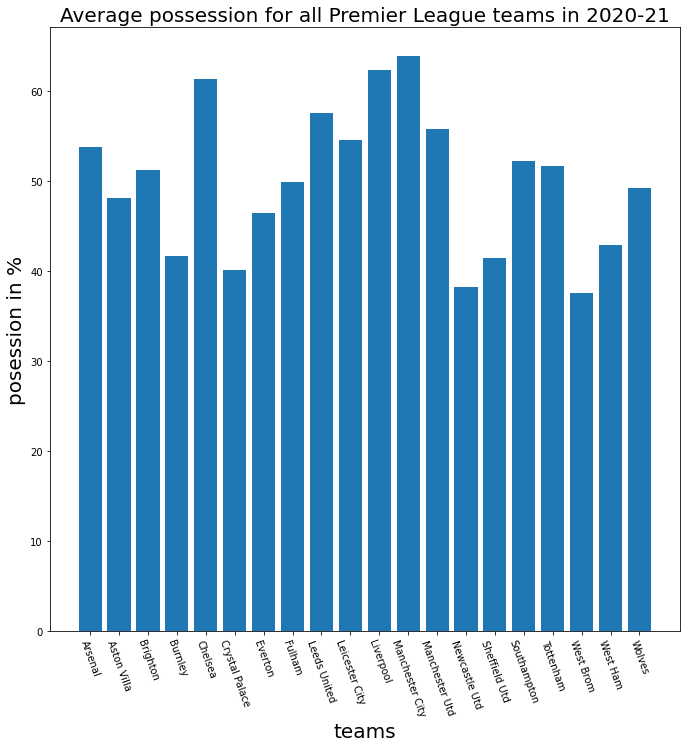

<Figure size 1440x720 with 0 Axes>

In [24]:
plt.bar(
    x=PL202021df["Squad"],
    height=PL202021df['Poss']
)
plt.xticks(rotation=290)
plt.rcParams["figure.figsize"] = [10.00, 10.50]
plt.rcParams["figure.autolayout"] = True
plt.ylabel("posession in %", fontsize=20, color = "black")
plt.xlabel("teams", fontsize = 20, color = "black")
plt.title("Average possession for all Premier League teams in 2020-21", fontsize = 20, color = "black")
fig = plt.figure()

fig.set_figheight(10)
fig.set_figwidth(20)
plt.show()

In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
PLtabledf = pd.read_csv("PL202021LeagueTable - Sheet1.csv")  # Read data into DataFrame
PLtabledf

Rk            Squad  MP   W   D   L  GF  GA  GD  Pts    xG   xGA   xGD  \
0    1  Manchester City  38  27   5   6  83  32  51   86  73.3  31.4  42.0   
1    2   Manchester Utd  38  21  11   6  73  44  29   74  60.2  42.2  18.0   
2    3        Liverpool  38  20   9   9  68  42  26   69  72.6  45.3  27.3   
3    4          Chelsea  38  19  10   9  58  36  22   67  64.0  32.8  31.2   
4    5   Leicester City  38  20   6  12  68  50  18   66  56.0  47.7   8.3   
5    6         West Ham  38  19   8  11  62  47  15   65  53.9  48.3   5.6   
6    7        Tottenham  38  18   8  12  68  45  23   62  54.5  49.5   5.0   
7    8          Arsenal  38  18   7  13  55  39  16   61  53.5  44.3   9.2   
8    9     Leeds United  38  18   5  15  62  54   8   59  57.5  62.9  -5.4   
9   10          Everton  38  17   8  13  47  48  -1   59  47.1  52.0  -4.9   
10  11      Aston Villa  38  16   7  15  55  46   9   55  52.9  52.9   0.1   
11  12    Newcastle Utd  38  12   9  17  46  62 -16   45  41.0  54.0 -13.0   
12  13           Wolves  38  12   9  17  36  52 -16   45  39.9  45.8  -6.0   
13  14   Crystal Palace  38  12   8  18  41  66 -25   44  32.4  57.5 -25.0   
14  15      Southampton  38  12   7  19  47  68 -21   43  42.4  54.2 -11.8   
15  16         Brighton  38   9  14  15  40  46  -6   41  51.6  37.7  13.9   
16  17          Burnley  38  10   9  19  33  55 -22   39  39.9  57.6 -17.7   
17  18           Fulham  38   5  13  20  27  53 -26   28  41.3  52.9 -11.7   
18  19        West Brom  38   5  11  22  35  76 -41   26  33.8  67.7 -34.0   
19  20    Sheffield Utd  38   7   2  29  20  63 -43   23  31.4  62.4 -31.0   

    xGD/90  Attendance                    Top Team Scorer         Goalkeeper  \
0     1.10         526                İlkay Gündoğan - 13            Ederson   
1     0.47         526               Bruno Fernandes - 18       David de Gea   
2     0.72         837                 Mohamed Salah - 22            Alisson   
3     0.82         526                       Jorginho - 7      Edouard Mendy   
4     0.22         421                   Jamie Vardy - 15  Kasper Schmeichel   
5     0.15         632  Tomáš Souček Michail Antonio - 10   Łukasz Fabiański   
6     0.13         632                    Harry Kane - 23        Hugo Lloris   
7     0.24         632           Alexandre Lacazette - 13         Bernd Leno   
8    -0.14         421               Patrick Bamford - 17      Illan Meslier   
9    -0.13         368         Dominic Calvert-Lewin - 16    Jordan Pickford   
10    0.00         526                 Ollie Watkins - 14  Emiliano Martínez   
11   -0.34         526                 Callum Wilson - 12        Karl Darlow   
12   -0.16         237         Rúben Neves Pedro Neto - 5       Rui Patrício   
13   -0.66         447                 Wilfried Zaha - 11     Vicente Guaita   
14   -0.31         526                    Danny Ings - 12      Alex McCarthy   
15    0.37         523                    Neal Maupay - 8     Robert Sánchez   
16   -0.47         178                    Chris Wood - 12          Nick Pope   
17   -0.31         211                     Bobby Reid - 5    Alphonse Areola   
18   -0.89         283               Matheus Pereira - 11      Sam Johnstone   
19   -0.82         263               David McGoldrick - 8     Aaron Ramsdale   

                                                Notes  
0           → UEFA Champions League via league finish  
1           → UEFA Champions League via league finish  
2           → UEFA Champions League via league finish  
3           → UEFA Champions League via league finish  
4                    → UEFA Europa League via cup win  
5              → UEFA Europa League via league finish  
6   → UEFA Europa Conference League via league fin...  
7                                                 NaN  
8                                                 NaN  
9                                                 NaN  
10                                                NaN  
11          

In [26]:
pointsDf = PLtabledf[["Rk","Squad","Pts"]] #merge dataframes to look at possession and points together
possDf = PL202021df[["Poss", "Squad"]]
merge1 = pd.merge(pointsDf,possDf , on = 'Squad', how = 'left')
merge1

Rk            Squad  Pts  Poss
0    1  Manchester City   86  63.9
1    2   Manchester Utd   74  55.8
2    3        Liverpool   69  62.4
3    4          Chelsea   67  61.4
4    5   Leicester City   66  54.6
5    6         West Ham   65  42.9
6    7        Tottenham   62  51.7
7    8          Arsenal   61  53.8
8    9     Leeds United   59  57.6
9   10          Everton   59  46.5
10  11      Aston Villa   55  48.1
11  12    Newcastle Utd   45  38.2
12  13           Wolves   45  49.3
13  14   Crystal Palace   44  40.1
14  15      Southampton   43  52.2
15  16         Brighton   41  51.3
16  17          Burnley   39  41.7
17  18           Fulham   28  49.9
18  19        West Brom   26  37.6
19  20    Sheffield Utd   23  41.5

In [27]:
merge2 = merge1["Poss"].rank(ascending = False)
merge2

0      1.0
1      5.0
2      2.0
3      3.0
4      6.0
5     15.0
6      9.0
7      7.0
8      4.0
9     14.0
10    13.0
11    19.0
12    12.0
13    18.0
14     8.0
15    10.0
16    16.0
17    11.0
18    20.0
19    17.0
Name: Poss, dtype: float64

By combining our first dataset with the squad table dataset, we plot the number of points a team has accumulated against the average possession of the team over the 38 games throughout the season to explore any possible relationships.

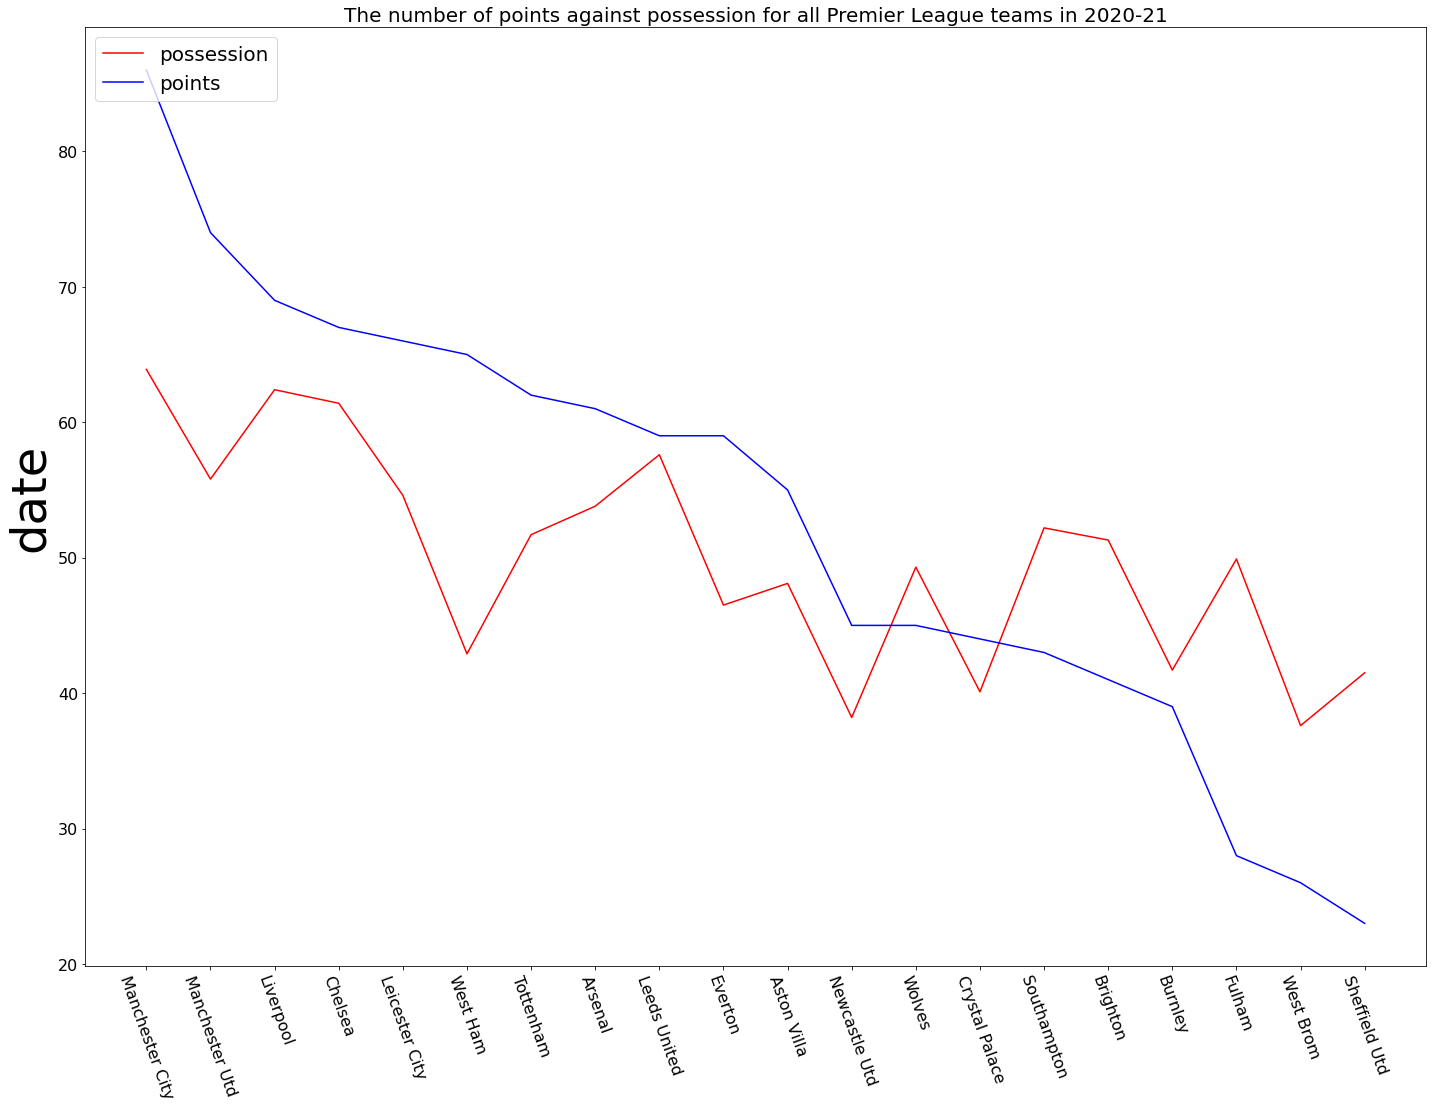

In [33]:
#maxc = max(merge1["Poss"] + merge1["Pts"] )
fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"] = [20.00, 15.50]
plt.rcParams["figure.autolayout"] = True
plt.xticks(rotation=290)
ax1.plot(merge1["Squad"],merge1["Poss"], color = "red",label = "possession")

ax1.plot(merge1["Squad"],merge1["Pts"],color='blue', label = "points")
plt.legend(loc="upper left", fontsize = 20)

plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.ylabel("date", fontsize=48)
plt.title("The number of points against possession for all Premier League teams in 2020-21", fontsize = 20)
plt.show()

As we can see from the above plot, higher average possession values do not necessarily mean that a team will win or draw more games and accumulate points throughout the season. The team that finished the season second , Manchester United, ranks fifth in the highest ball possession rankings. Similarly , West Ham United and Everton finished sixth and ninth respectively , with two of the lowest possession stats in the league. Thus , it is evident that the ball possession percentage of a team does not always necessarily indicate higher success. 

## 1.2 Goals , Assists , Expected Goals, and Expected Assists in the Premier League 2020-21

One of the ways to identify and value the chances in football is through the metric of ‘Expected Goals’. It has become quite popular in recent years with many Premier League experts and analysts deciding to use the same. Expected Goals is a metric that is used to denote the likelihood of a short turning into a goal and it is usually expressed in the numbers from 0 to 1. A lot of historical data and factors are taken into account for the calculation of this metric. This data is useful in identifying the number of goals that a team or player will have the opportunity to score in a specific match. The world of advanced metrics – like Expected Goals – has already been in use in many other sports like American football and basketball. Now, it has started making its presence into football as well. The ‘Expected Goals’ is a metric from 0 to 1. It is used to denote the likelihood of a particular shot ending up as a goal. If a particular shot has been given an xG value of one, it denotes that the particular shot has a 100% chance of becoming a goal. Thus, the value of xG is directly proportional to the likelihood of converting an opportunity. A more accurate analysis can be obtained by using npxG, which does away with penalties. It is no secret that penalties come with a greater likelihood of scoring. In terms of the xG numbers, a penalty will be rated at 0.76. Hence, it has a significant likelihood of distorting the entire analysis. This can be eliminated to a great extent with the use of npxG. We look at these metrics for Premier League Teams during the 2020-21 season by combining some metrics from our first dataset with others from the second dataset and evaluate how they relate to the success of the teams and their final position on the table.




In [34]:
ptsDf = PLtabledf[["Rk","Squad","Pts","xGA","xGD","GF","GA","GD"]]
goalsDf = PL202021df[["Gls","xG","npxG", "Squad","PK"]]
merge2 = pd.merge(ptsDf,goalsDf , on = 'Squad', how = 'left')
merge2

Rk            Squad  Pts   xGA   xGD  GF  GA  GD  Gls    xG  npxG  PK
0    1  Manchester City   86  31.4  42.0  83  32  51   82  73.3  66.6   5
1    2   Manchester Utd   74  42.2  18.0  73  44  29   70  60.2  51.9  10
2    3        Liverpool   69  45.3  27.3  68  42  26   65  72.6  68.1   6
3    4          Chelsea   67  32.8  31.2  58  36  22   56  64.0  56.4   8
4    5   Leicester City   66  47.7   8.3  68  50  18   64  56.0  46.9  10
5    6         West Ham   65  48.3   5.6  62  47  15   60  53.9  50.7   2
6    7        Tottenham   62  49.5   5.0  68  45  23   66  54.5  50.7   5
7    8          Arsenal   61  44.3   9.2  55  39  16   53  53.5  49.0   6
8    9     Leeds United   59  62.9  -5.4  62  54   8   60  57.5  54.5   4
9   10          Everton   59  52.0  -4.9  47  48  -1   45  47.1  43.4   4
10  11      Aston Villa   55  52.9   0.1  55  46   9   52  52.9  48.5   5
11  12    Newcastle Utd   45  54.0 -13.0  46  62 -16   44  41.0  35.5   6
12  13           Wolves   45  45.8  -6.0  36  52 -16   34  39.9  36.8   4
13  14   Crystal Palace   44  57.5 -25.0  41  66 -25   39  32.4  29.5   3
14  15      Southampton   43  54.2 -11.8  47  68 -21   47  42.4  37.9   5
15  16         Brighton   41  37.7  13.9  40  46  -6   39  51.6  44.8   6
16  17          Burnley   39  57.6 -17.7  33  55 -22   32  39.9  37.6   3
17  18           Fulham   28  52.9 -11.7  27  53 -26   26  41.3  36.8   3
18  19        West Brom   26  67.7 -34.0  35  76 -41   33  33.8  30.7   4
19  20    Sheffield Utd   23  62.4 -31.0  20  63 -43   19  31.4  28.4   3

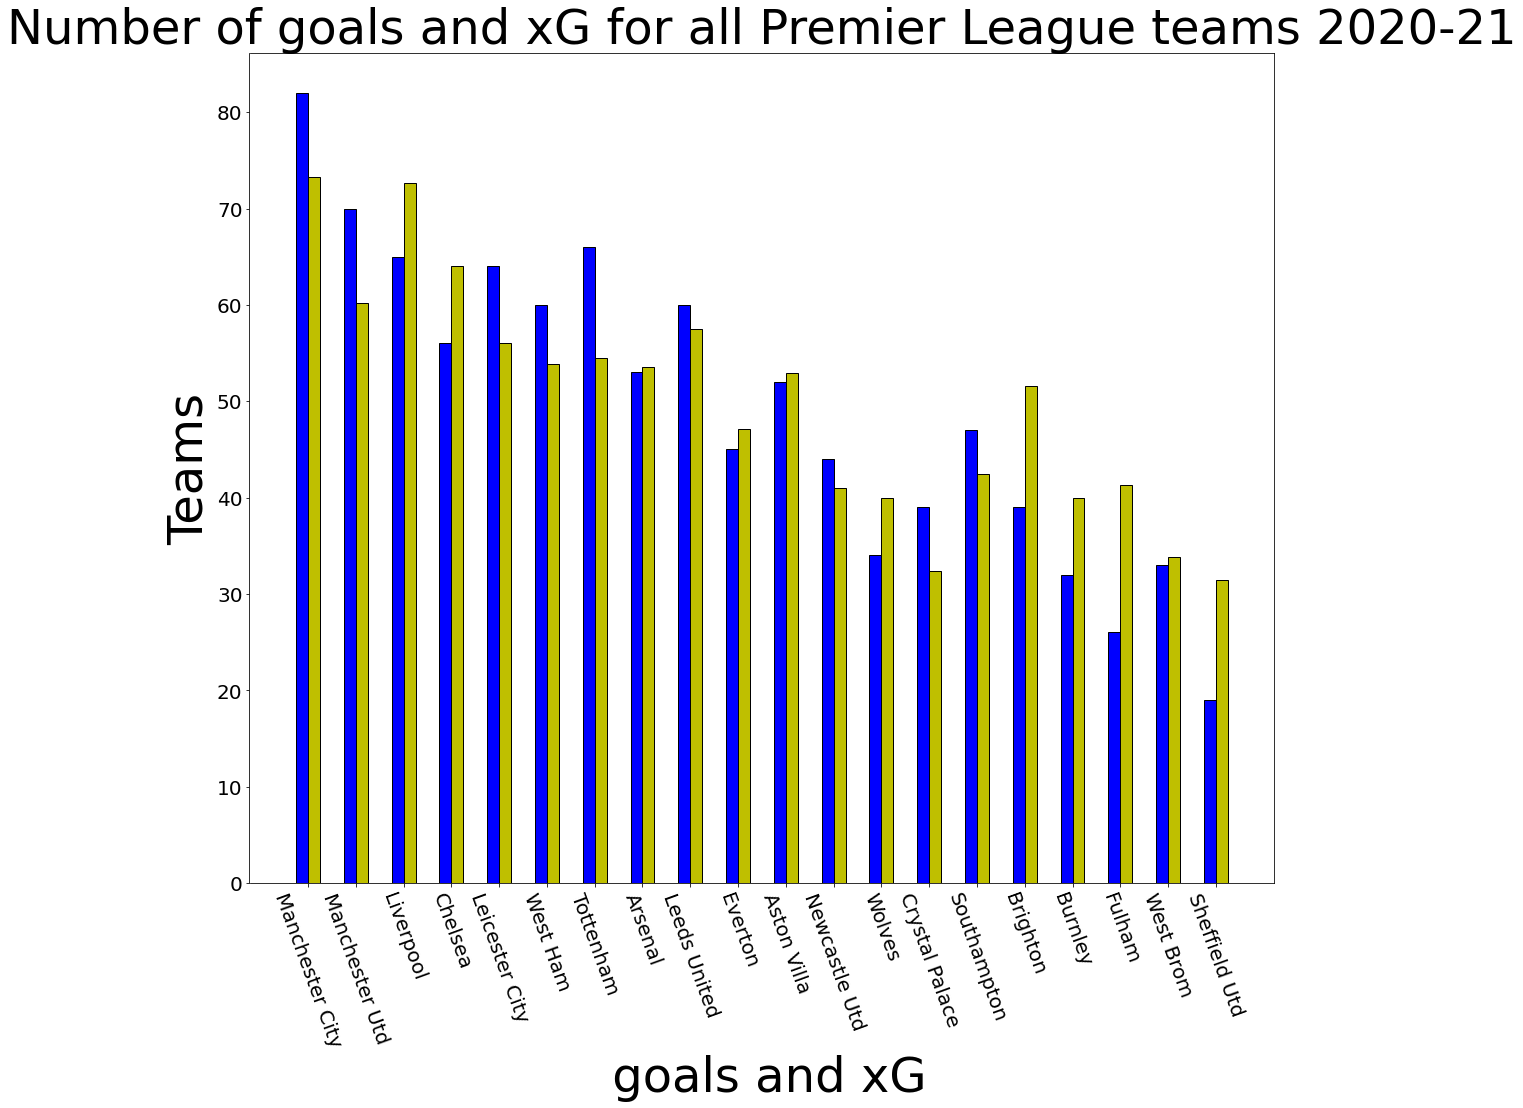

In [86]:
width = 0.25
plt.bar(r,merge2["Gls"], color = 'b',    #plot goals against expected goals on the same graph
        width = width, edgecolor = 'black',
        )
plt.bar(r+ width,merge2["xG"], color = 'y',
        width = width, edgecolor = 'black',
      )
plt.xticks(r + width/2,merge2["Squad"])
plt.xticks(rotation=290)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel(" goals and xG",fontsize=48)
plt.ylabel("Teams",fontsize=48)
plt.title("Number of goals and xG for all Premier League teams 2020-21",fontsize=48)
plt.show()

As we can observe from the above plot, xG is a good predictor of the goals a team will score based on chances created. But it is far from absolute. Many teams have higher goals than expected goals and vice versa. If we look at statistics for a specific game , xG is actually not the best predictor of the scores in football games , due to variance. But looking at data over a season of 38 games, xG can give us a good picture of where teams stand in terms of performance. Some teams like Manchester United , West Ham and Tottenham have scored more than their expected goals while other teams, specifically down at the bottom of the table, like Fulham and Brighton scored less. This means that during the season, teams who have more goals than expected goals have converted harder chances to goals whereas teams who have scored less goals than the chances created have had trouble converting good chances to goals.

In [36]:
merge2["Goals not scored"] = merge2["xG"] - merge2["GF"]
x = merge2.sort_values("Goals not scored", ascending = False)
x

Rk            Squad  Pts   xGA   xGD  GF  GA  GD  Gls    xG  npxG  PK  \
17  18           Fulham   28  52.9 -11.7  27  53 -26   26  41.3  36.8   3   
15  16         Brighton   41  37.7  13.9  40  46  -6   39  51.6  44.8   6   
19  20    Sheffield Utd   23  62.4 -31.0  20  63 -43   19  31.4  28.4   3   
16  17          Burnley   39  57.6 -17.7  33  55 -22   32  39.9  37.6   3   
3    4          Chelsea   67  32.8  31.2  58  36  22   56  64.0  56.4   8   
2    3        Liverpool   69  45.3  27.3  68  42  26   65  72.6  68.1   6   
12  13           Wolves   45  45.8  -6.0  36  52 -16   34  39.9  36.8   4   
9   10          Everton   59  52.0  -4.9  47  48  -1   45  47.1  43.4   4   
18  19        West Brom   26  67.7 -34.0  35  76 -41   33  33.8  30.7   4   
7    8          Arsenal   61  44.3   9.2  55  39  16   53  53.5  49.0   6   
10  11      Aston Villa   55  52.9   0.1  55  46   9   52  52.9  48.5   5   
8    9     Leeds United   59  62.9  -5.4  62  54   8   60  57.5  54.5   4   
14  15      Southampton   43  54.2 -11.8  47  68 -21   47  42.4  37.9   5   
11  12    Newcastle Utd   45  54.0 -13.0  46  62 -16   44  41.0  35.5   6   
5    6         West Ham   65  48.3   5.6  62  47  15   60  53.9  50.7   2   
13  14   Crystal Palace   44  57.5 -25.0  41  66 -25   39  32.4  29.5   3   
0    1  Manchester City   86  31.4  42.0  83  32  51   82  73.3  66.6   5   
4    5   Leicester City   66  47.7   8.3  68  50  18   64  56.0  46.9  10   
1    2   Manchester Utd   74  42.2  18.0  73  44  29   70  60.2  51.9  10   
6    7        Tottenham   62  49.5   5.0  68  45  23   66  54.5  50.7   5   

    Goals not scored  
17              14.3  
15              11.6  
19              11.4  
16               6.9  
3                6.0  
2                4.6  
12               3.9  
9                0.1  
18              -1.2  
7               -1.5  
10              -2.1  
8               -4.5  
14              -4.6  
11              -5.0  
5               -8.1  
13              -8.6  
0               -9.7  
4              -12.0  
1              -12.8  
6              -13.5

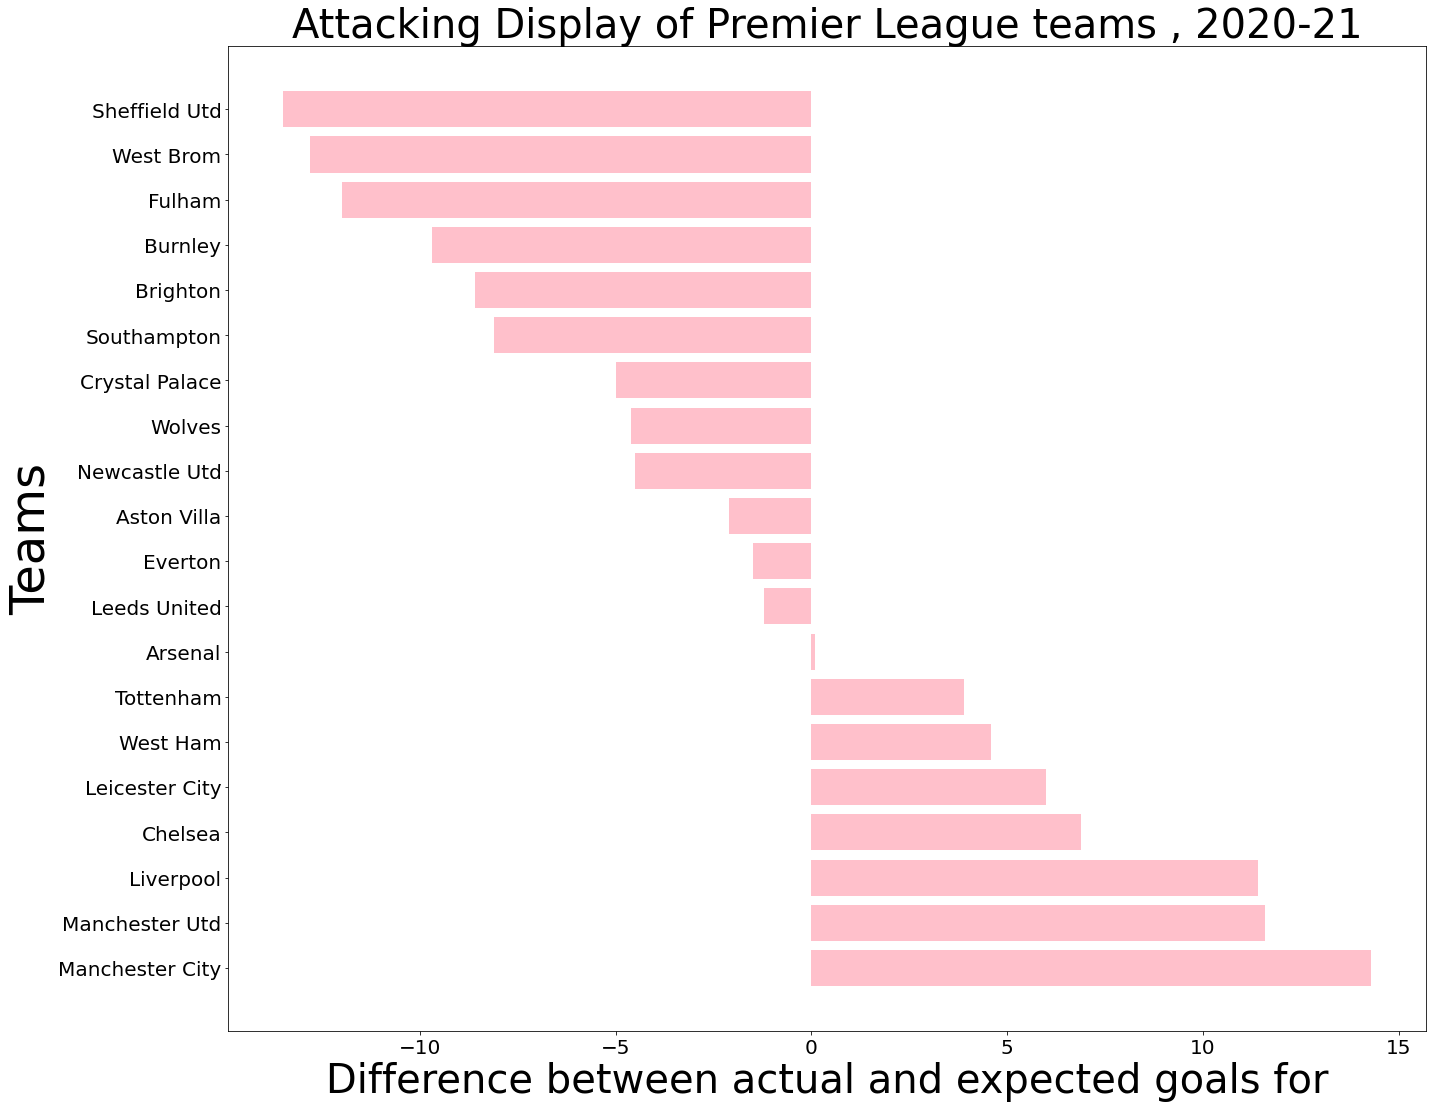

In [37]:
import matplotlib.pyplot as plt  # Import necessary libraries
z=x["Goals not scored"]
# getting values against each value of y
y=merge2["Squad"]
plt.barh(y, z, color="pink")
 
# setting label of y-axis
plt.ylabel("Teams" , fontsize=48)
# setting label of x-axis
plt.xlabel("Difference between actual and expected goals for" , fontsize=40)
plt.title("Attacking Display of Premier League teams , 2020-21", fontsize=40)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.show()

## 1.3 Non-Penalty expected goals: Why it matters

Even though expected goals gives a good model, the existence of penalties in football means that expected goals can sometimes give us an inaccurate representation of what is happening. Since penalties are a high-quality chance on the expected goal index, we can look at npxG or non-penalty expected goals for a better representation of the goals expected based on the quality of chances created from phases of actual open play. Since we do not have the non-penalty goals data in our dataset, we make a new column of non-penalty goals ourselves by taking the difference of total goals and penalties converted to goals for every team. We then plot them together to have a better look at how teams fared during the 2020-21 season from open play. 

In [38]:
merge2["npG"] = merge2["Gls"]- merge2["PK"]
merge2

Rk            Squad  Pts   xGA   xGD  GF  GA  GD  Gls    xG  npxG  PK  \
0    1  Manchester City   86  31.4  42.0  83  32  51   82  73.3  66.6   5   
1    2   Manchester Utd   74  42.2  18.0  73  44  29   70  60.2  51.9  10   
2    3        Liverpool   69  45.3  27.3  68  42  26   65  72.6  68.1   6   
3    4          Chelsea   67  32.8  31.2  58  36  22   56  64.0  56.4   8   
4    5   Leicester City   66  47.7   8.3  68  50  18   64  56.0  46.9  10   
5    6         West Ham   65  48.3   5.6  62  47  15   60  53.9  50.7   2   
6    7        Tottenham   62  49.5   5.0  68  45  23   66  54.5  50.7   5   
7    8          Arsenal   61  44.3   9.2  55  39  16   53  53.5  49.0   6   
8    9     Leeds United   59  62.9  -5.4  62  54   8   60  57.5  54.5   4   
9   10          Everton   59  52.0  -4.9  47  48  -1   45  47.1  43.4   4   
10  11      Aston Villa   55  52.9   0.1  55  46   9   52  52.9  48.5   5   
11  12    Newcastle Utd   45  54.0 -13.0  46  62 -16   44  41.0  35.5   6   
12  13           Wolves   45  45.8  -6.0  36  52 -16   34  39.9  36.8   4   
13  14   Crystal Palace   44  57.5 -25.0  41  66 -25   39  32.4  29.5   3   
14  15      Southampton   43  54.2 -11.8  47  68 -21   47  42.4  37.9   5   
15  16         Brighton   41  37.7  13.9  40  46  -6   39  51.6  44.8   6   
16  17          Burnley   39  57.6 -17.7  33  55 -22   32  39.9  37.6   3   
17  18           Fulham   28  52.9 -11.7  27  53 -26   26  41.3  36.8   3   
18  19        West Brom   26  67.7 -34.0  35  76 -41   33  33.8  30.7   4   
19  20    Sheffield Utd   23  62.4 -31.0  20  63 -43   19  31.4  28.4   3   

    Goals not scored  npG  
0               -9.7   77  
1              -12.8   60  
2                4.6   59  
3                6.0   48  
4              -12.0   54  
5               -8.1   58  
6              -13.5   61  
7               -1.5   47  
8               -4.5   56  
9                0.1   41  
10              -2.1   47  
11              -5.0   38  
12               3.9   30  
13              -8.6   36  
14              -4.6   42  
15              11.6   33  
16               6.9   29  
17              14.3   23  
18              -1.2   29  
19              11.4   16

The above plot is an accurate representation of the goals teams scored in the season in relation to their expected goal. In this plot, we can observe an interesting trend: the bottom 6 teams in the table have scored a lot less goals than their expected goals, where as mid-table teams like Wolves and Crystal Palace have scored more goals from similar expected goals values. This shows that teams who are better at converting harder chances to goals have had better  success in the Premier League.

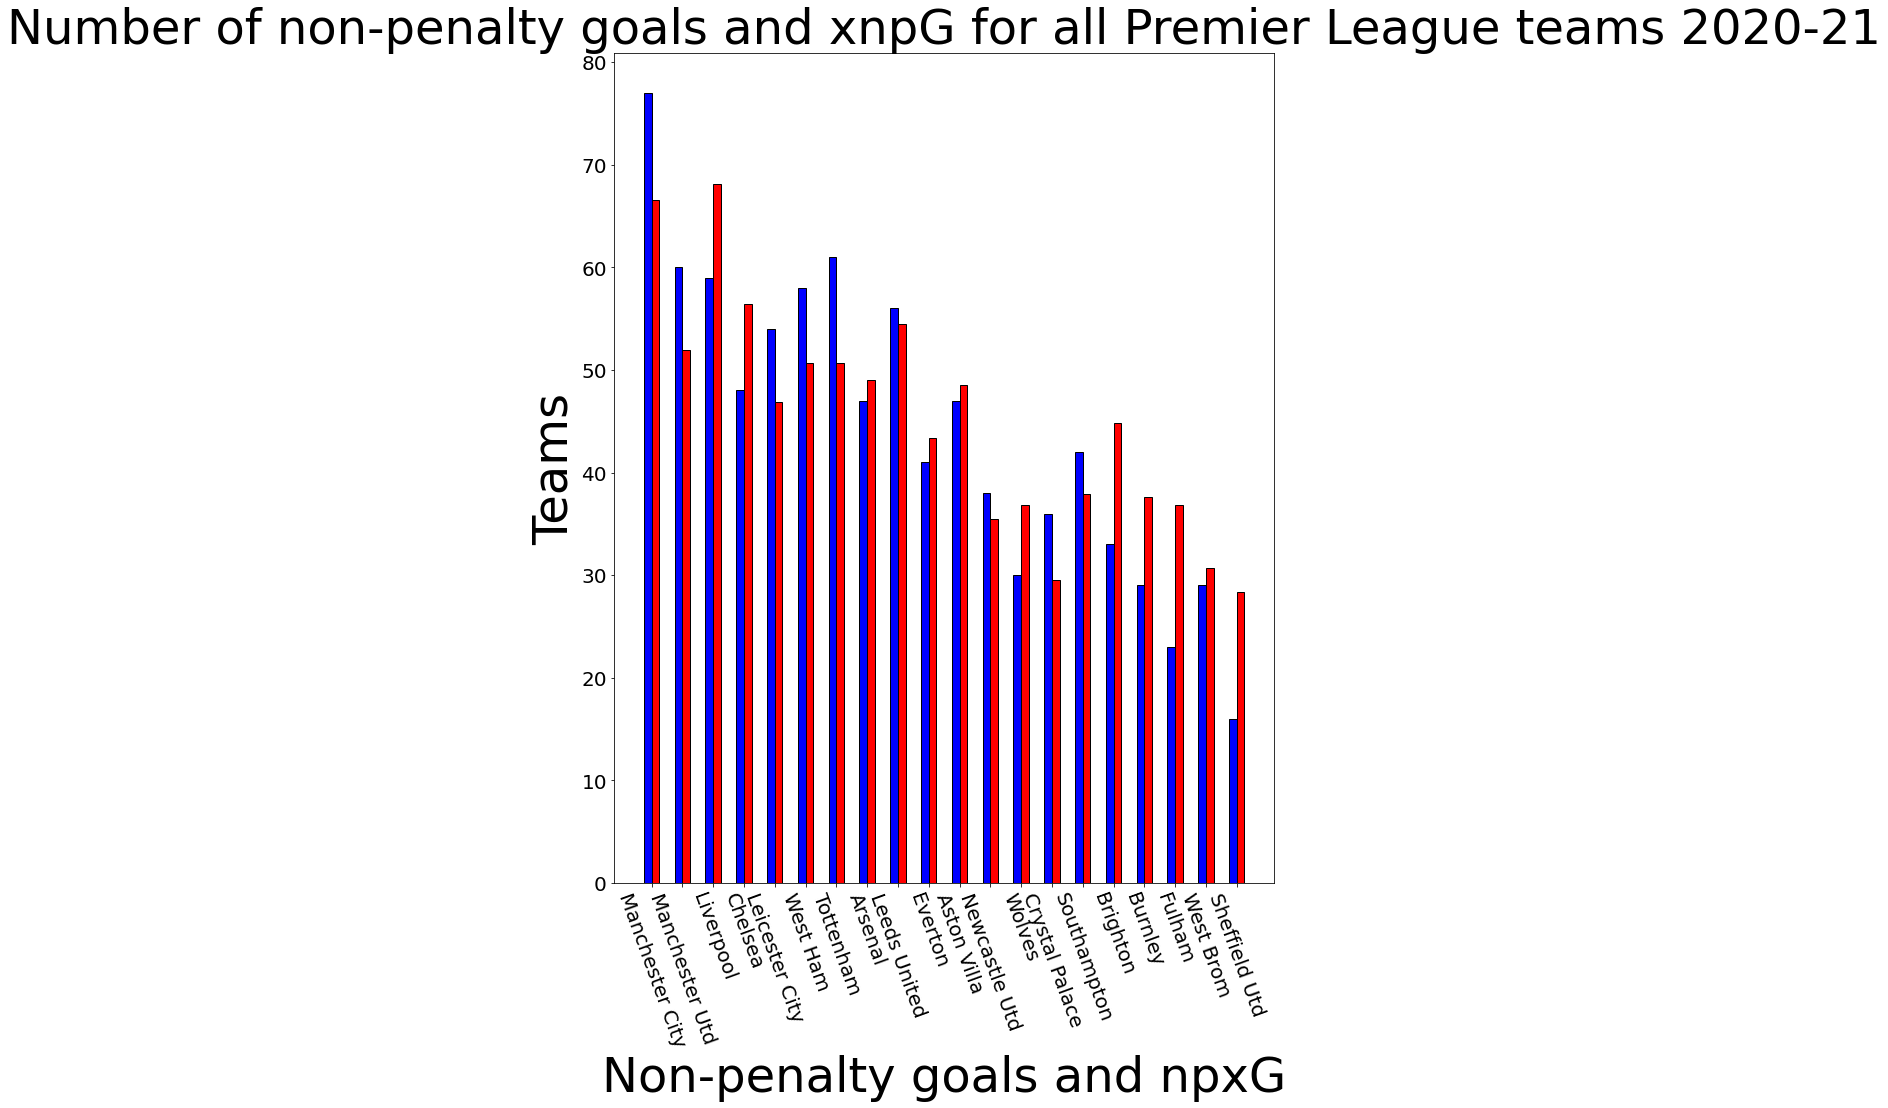

In [42]:
n=20
r = np.arange(n)
width = 0.25
plt.bar(r,merge2["npG"], color = 'b',
        width = width, edgecolor = 'black',
        label='Women')
plt.bar(r+ width,merge2["npxG"], color = 'r',
        width = width, edgecolor = 'black',
        label='Men')
plt.xticks(r + width/2,merge2["Squad"])
plt.xticks(rotation=290)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel("Non-penalty goals and npxG",fontsize=48)
plt.ylabel("Teams",fontsize=48)
plt.title("Number of non-penalty goals and xnpG for all Premier League teams 2020-21",fontsize=48)
plt.show()

## 1.4 Goals Conceded and xGA: Why these defensive stats matter

Even though all all teams have the possibility of conceding good quality chances during games, not all teams actually concede goals. This comes down to brilliant defensive performances. Does this have an impact on how teams perform in the Premier League? Let's have a look:

In [43]:
merge2["gA-xgA"] = merge2["GA"] - merge2["xGA"]
merge2
merge3= merge2.sort_values("gA-xgA", ascending = False)
merge3

Rk            Squad  Pts   xGA   xGD  GF  GA  GD  Gls    xG  npxG  PK  \
14  15      Southampton   43  54.2 -11.8  47  68 -21   47  42.4  37.9   5   
13  14   Crystal Palace   44  57.5 -25.0  41  66 -25   39  32.4  29.5   3   
18  19        West Brom   26  67.7 -34.0  35  76 -41   33  33.8  30.7   4   
15  16         Brighton   41  37.7  13.9  40  46  -6   39  51.6  44.8   6   
11  12    Newcastle Utd   45  54.0 -13.0  46  62 -16   44  41.0  35.5   6   
12  13           Wolves   45  45.8  -6.0  36  52 -16   34  39.9  36.8   4   
3    4          Chelsea   67  32.8  31.2  58  36  22   56  64.0  56.4   8   
4    5   Leicester City   66  47.7   8.3  68  50  18   64  56.0  46.9  10   
1    2   Manchester Utd   74  42.2  18.0  73  44  29   70  60.2  51.9  10   
0    1  Manchester City   86  31.4  42.0  83  32  51   82  73.3  66.6   5   
19  20    Sheffield Utd   23  62.4 -31.0  20  63 -43   19  31.4  28.4   3   
17  18           Fulham   28  52.9 -11.7  27  53 -26   26  41.3  36.8   3   
5    6         West Ham   65  48.3   5.6  62  47  15   60  53.9  50.7   2   
16  17          Burnley   39  57.6 -17.7  33  55 -22   32  39.9  37.6   3   
2    3        Liverpool   69  45.3  27.3  68  42  26   65  72.6  68.1   6   
9   10          Everton   59  52.0  -4.9  47  48  -1   45  47.1  43.4   4   
6    7        Tottenham   62  49.5   5.0  68  45  23   66  54.5  50.7   5   
7    8          Arsenal   61  44.3   9.2  55  39  16   53  53.5  49.0   6   
10  11      Aston Villa   55  52.9   0.1  55  46   9   52  52.9  48.5   5   
8    9     Leeds United   59  62.9  -5.4  62  54   8   60  57.5  54.5   4   

    Goals not scored  npG  gA-xgA  
14              -4.6   42    13.8  
13              -8.6   36     8.5  
18              -1.2   29     8.3  
15              11.6   33     8.3  
11              -5.0   38     8.0  
12               3.9   30     6.2  
3                6.0   48     3.2  
4              -12.0   54     2.3  
1              -12.8   60     1.8  
0               -9.7   77     0.6  
19              11.4   16     0.6  
17              14.3   23     0.1  
5               -8.1   58    -1.3  
16               6.9   29    -2.6  
2                4.6   59    -3.3  
9                0.1   41    -4.0  
6              -13.5   61    -4.5  
7               -1.5   47    -5.3  
10              -2.1   47    -6.9  
8               -4.5   56    -8.9

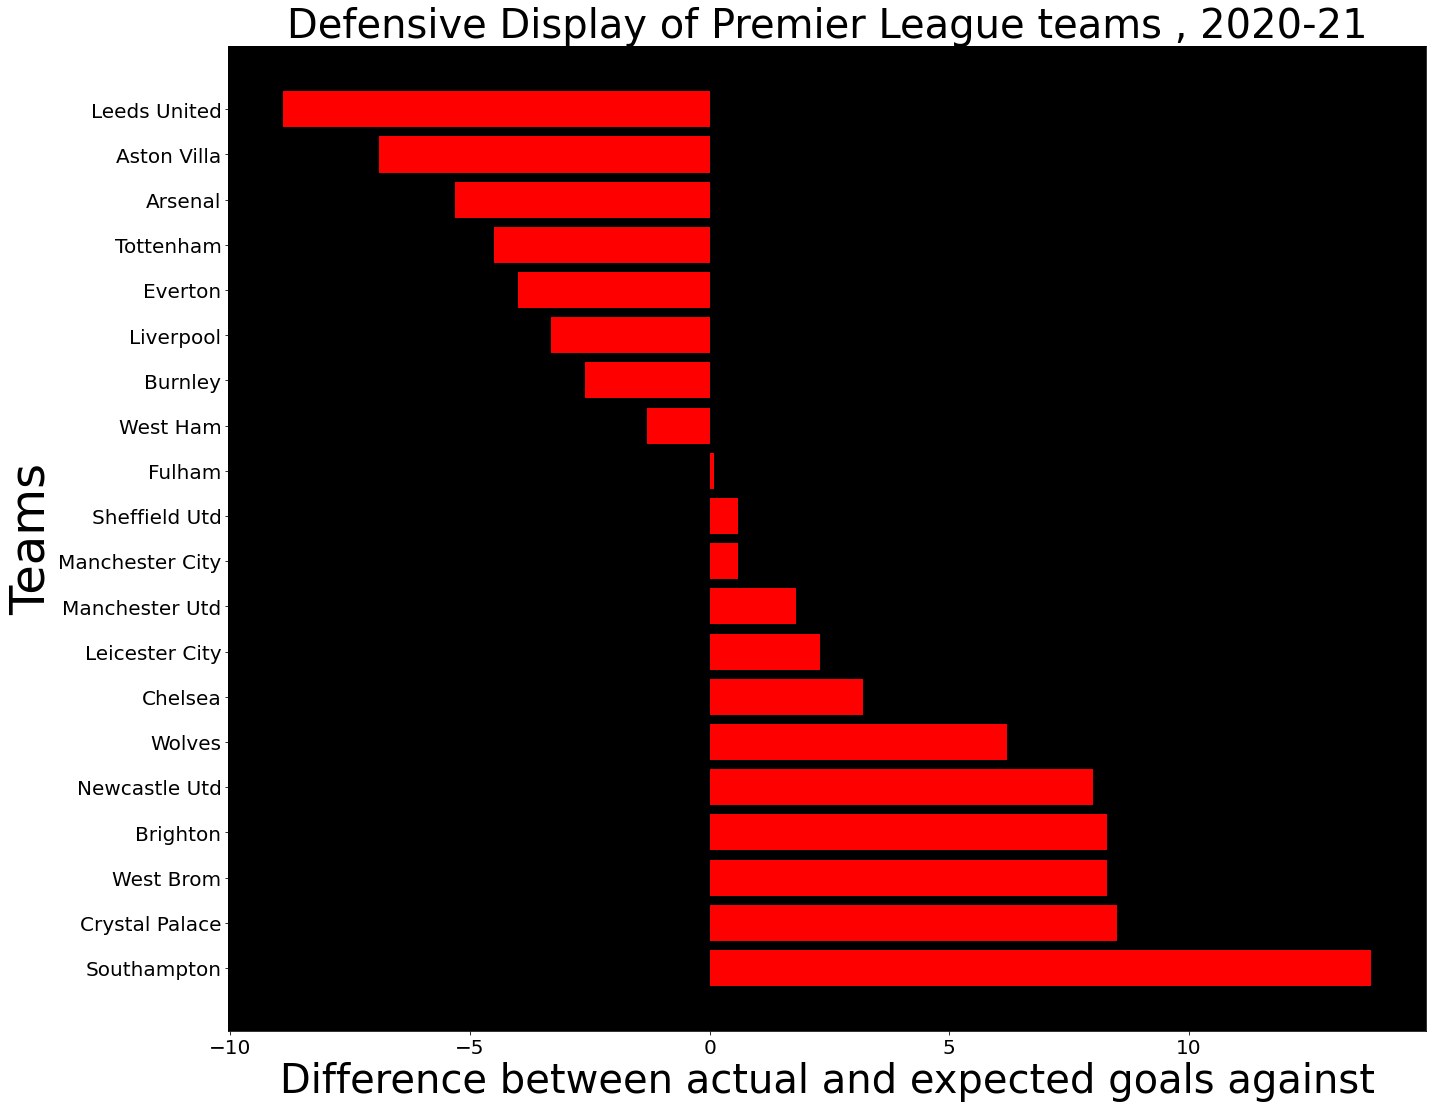

In [44]:
x=merge3["gA-xgA"]
# getting values against each value of y
y=merge3["Squad"]
plt.barh(y, x, color="red")
 
# setting label of y-axis
plt.ylabel("Teams" , fontsize=48)
ax = plt.axes()
ax.set_facecolor("black") 
# setting label of x-axis
plt.xlabel("Difference between actual and expected goals against" , fontsize=40)
plt.title("Defensive Display of Premier League teams , 2020-21", fontsize=40)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.show()

As we can note from the above plot, there are drastic differences when it comes to actual and expected goals against for teams in the Premier League. A majority of the teams in the Premier League conceded more goals than expected in the 2020-21 season. Southampton have conceded 14 more goals than they were expected to concede during the 2020-21 season, an alarming stat indicating defensive weakness! (Note that this metric refers to defensive weakness in the defensive and goalkeeping areas as the primary goal of team defense in football is to prevent from chances being conceded in the first place). On the other hand , teams like Leeds United , Aston Villa and Arsenal have exceptionally overperformed in this regard, conceding a lot less goals than they were expected to concede throughout the season.

## 1.5.Team Discipline

In football, fouls committed by players are penalized with yellow cards or red cards depending on the intent, severity and impact of the situation. The Premier League has a reputation for being one of the most aggressive leagues in the world. When players are penalized by a yellow card, the caution they receive restricts them in terms of risk-taking and aggression for the rest of the game. When players are penalized with red card, they are sent off from the game. This has a profound impact on the performance of teams as better disciplined teams have a better chance of keeping all their players on the pitch. Let us have a look at how Premier League teams fared for discipline during the 2020-21 season:

In [45]:
disciplineDF = PL202021df[["Squad", "CrdY", "CrdR"]]
disciplineDF["Total Cards"] = disciplineDF["CrdY"] + disciplineDF["CrdR"]
disciplineDF.sort_values("Total Cards", ascending = False)

<ipython-input-45-d58982140dac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disciplineDF["Total Cards"] = disciplineDF["CrdY"] + disciplineDF["CrdR"]


Squad  CrdY  CrdR  Total Cards
14    Sheffield Utd    73     3           76
1       Aston Villa    71     4           75
7            Fulham    67     3           70
13    Newcastle Utd    65     3           68
12   Manchester Utd    64     1           65
8      Leeds United    61     1           62
6           Everton    59     2           61
9    Leicester City    61     0           61
16        Tottenham    57     2           59
5    Crystal Palace    56     2           58
19           Wolves    55     1           56
2          Brighton    49     6           55
17        West Brom    51     4           55
15      Southampton    52     3           55
0           Arsenal    49     5           54
4           Chelsea    51     3           54
18         West Ham    50     3           53
11  Manchester City    46     2           48
3           Burnley    48     0           48
10        Liverpool    40     0           40

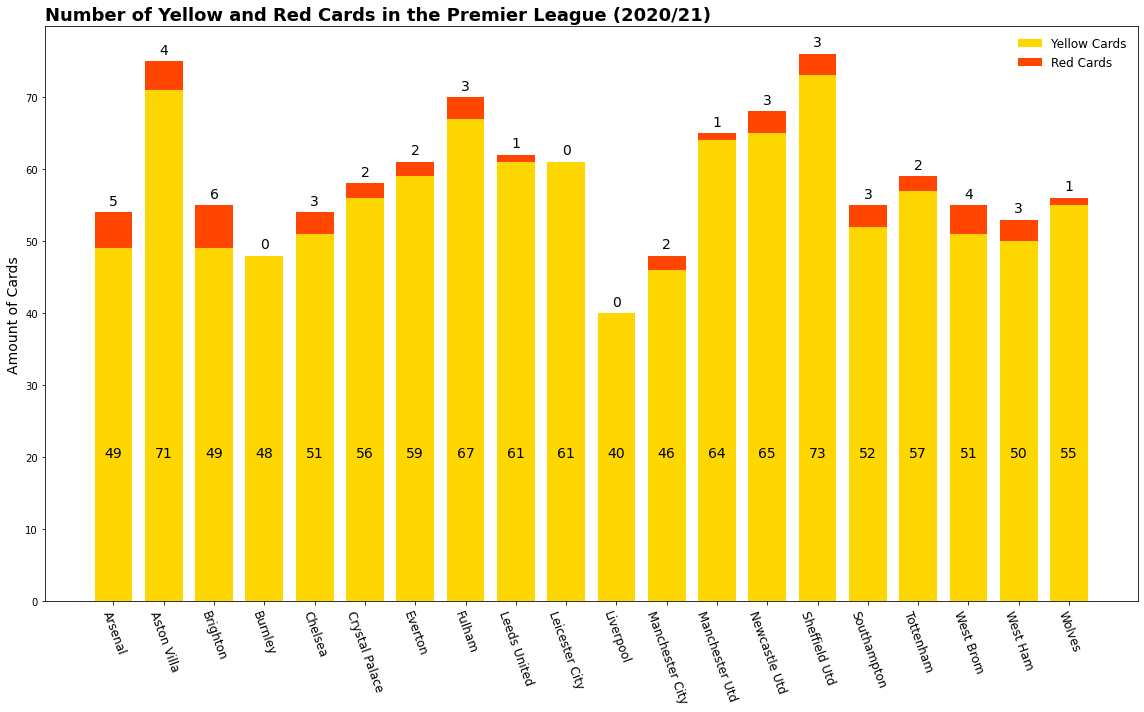

In [46]:
redCards = disciplineDF["CrdR"].tolist()
yellowCards = disciplineDF["CrdY"].tolist()
teams = disciplineDF["Squad"].tolist()
width = 0.75

 

fig, ax = plt.subplots(figsize=(16, 10))

ax.bar(teams, yellowCards, width, label='Yellow Cards', color='gold')
ax.bar(teams, redCards, width, bottom=yellowCards, label='Red Cards', color='orangered')

ax.set_ylabel('Amount of Cards', fontsize=14)
ax.set_title('Number of Yellow and Red Cards in the Premier League (2020/21)', loc='left', fontsize=18, fontweight ='bold')
plt.xticks(teams, rotation=90, fontsize=12)

 

for index, data in enumerate(redCards):
    plt.text(x=index , y=data + yellowCards[index] + 1 , s=f"{data}" , fontdict=dict(fontsize=14), horizontalalignment='center')

for index, data in enumerate(yellowCards):
    plt.text(x=index , y=20 , s=f"{data}" , fontdict=dict(fontsize=14), horizontalalignment='center')
    
ax.legend(fontsize=12, frameon=False)
plt.xticks(rotation=290)
plt.show()


As we can observe from the above plot , Sheffield United and Aston Villa and Fulham are the three most aggressive teams in the Premier League, with 76, 75 and 70 cards received during the season. Sheffield United and Fulham finished the season as two of the bottom three teams. On the other end, We can see that 4 of the 5 teams that received the least number of bookings have finished in the top 6 of the table. This shows the significant impact that discipline has on performance. 

# Part 2 : Goalkeeping: the ultimate difference maker?

 Goalkeeping is one of the most crucial areas for teams to perform at their best potential. The increased involvement of goalkeepers in build-up play also makes it arguably the most important position in the team.When asked about how important a good defense is for a team , the 13-time Premier League Winning Manager Sir Alex Ferguson Once Said ,"Attack wins you games, defence wins you titles” - Does the famous Sir Alex Ferguson quote actually hold true? We investigate the Goalkeeping data for the Premier League 2020/21 season. We see what sets Elite goalkeepers apart from average goalkeepers and how that affects the success of their teams throughout the season.

## 2.1 Defending Set Pieces 

Defending set pieces(free kicks , corners,..) is very important in football not to concede a goal. They are the most direct opportunities for an opponent to score. The goalkeeper has a big role in organizing the team and as the last man of defense. We combine goals conceded from corner kicks and goals conceded from free kicks to see which teams defend well from set pieces and which teams suffer.

In [47]:
df = pd.read_csv("PL Goalkeeping Advanced - Sheet1.csv")  # Read data into DataFrame
df["setPiece"] = df["FK"]+df["CK"]
sortedDf = df.sort_values("setPiece")
sortedDf

Squad  # Pl  90s  GA  PKA  FK  CK  OG  PSxG  PSxG/SoT  PSxG+/-  \
16        Tottenham     1   38  45   10   0   3   3  47.0      0.28      5.0   
11  Manchester City     3   38  32    8   0   3   1  32.3      0.27      1.3   
0           Arsenal     3   38  39    2   0   5   4  41.4      0.31      6.4   
7            Fulham     2   38  53    7   0   5   1  58.6      0.33      6.6   
1       Aston Villa     1   38  46    5   2   4   1  52.4      0.27      7.4   
15      Southampton     2   38  68    8   1   5   1  56.7      0.30    -10.3   
4           Chelsea     3   38  36    3   1   5   1  32.9      0.29     -2.1   
6           Everton     3   38  48    3   1   5   1  48.5      0.30      1.5   
13    Newcastle Utd     2   38  62    4   1   5   3  56.5      0.29     -2.5   
18         West Ham     2   38  47    3   0   7   4  48.4      0.32      5.4   
10        Liverpool     3   38  42    4   1   6   0  48.0      0.33      6.0   
14    Sheffield Utd     1   38  63    3   0   8   3  61.9      0.29      1.9   
9    Leicester City     1   38  50    4   0   9   2  48.5      0.34      0.5   
2          Brighton     2   38  46    6   0   9   2  45.6      0.35      1.6   
5    Crystal Palace     2   38  66    3   1   9   0  62.6      0.35     -3.4   
12   Manchester Utd     2   38  44    4   1   9   2  42.4      0.29      0.4   
3           Burnley     3   38  55    3   0  11   1  51.5      0.27     -2.5   
19           Wolves     2   38  52    7   1  10   3  45.7      0.28     -3.3   
8      Leeds United     2   38  54    8   1  11   2  59.6      0.27      7.6   
17        West Brom     2   38  76    7   2  14   3  77.1      0.30      4.1   

     /90  Cmp  Att  Cmp%  Att.1  Thr  Launch%  AvgLen  Att.2  Launch%.1  \
16  0.13  202  489  41.3    799  158     46.3    37.3    268       44.4   
11  0.03  141  312  45.2    966  158     24.5    31.4    168       44.6   
0   0.17  116  352  33.0    998  187     21.6    28.5    236       57.6   
7   0.17  178  445  40.0    791  165     37.7    33.9    256       57.4   
1   0.20  289  728  39.7   1041  162     52.7    42.5    254       70.5   
15 -0.27  198  678  29.2   1108  153     46.8    37.6    235       67.7   
4  -0.05  165  346  47.7   1044  166     25.3    29.1    232       35.3   
6   0.04  328  765  42.9   1106  159     52.9    43.2    262       68.7   
13 -0.07  263  718  36.6    812  152     57.0    45.4    341       74.8   
18  0.14  294  705  41.7    775  146     61.2    46.2    293       78.8   
10  0.16  147  326  45.1   1089  189     23.6    30.7    209       33.0   
14  0.05  290  859  33.8    860  124     70.0    52.8    281       91.5   
9   0.01  226  533  42.4   1009  164     42.4    38.0    209       50.2   
2   0.04  239  613  39.0   1259  163     38.6    36.7    235       54.0   
5  -0.09  256  739  34.6    779  149     59.2    44.1    322       86.3   
12  0.01  135  328  41.2    642  141     35.7    34.2    266       37.2   
3  -0.07  354  901  39.3    849  134     75.6    53.8    299       86.6   
19 -0.09  206  459  44.9    555  140     51.9    40.2    270       63.3   
8   0.20  197  435  45.3   1145  290     27.9    30.3    297       38.7   
17  0.11  344  990  34.7   1012  171     71.1    51.2    307       87.9   

    AvgLen.1  Opp  Stp  Stp%  #OPA  #OPA/90  AvgDist  setPiece  
16      36.7  366   18   4.9    16     0.42     13.4         3  
11      42.0  196   14   7.1    23     0.61     15.6         3  
0       46.0  334   30   9.0    23     0.61     14.5         5  
7       43.0  341   34  10.0    21     0.55     13.9         5  
1       52.9  393   33   8.4    21     0.55     13.1         6  
15      48.1  327   29   8.9    27     0.71     15.1         6  
4       32.5  255   18   7.1    28     0.74     16.0         6  
6       54.5  348   28   8.0    20     0.53     14.4         6  
13      55.6  400   35   8.8    12     0.32     12.2         6  
18      56.3  389   27   6.9    12     0.32     12.4         7  
10      35.1  266   26   9.8    46     1.2

In [48]:
sortedSetPieceDf = sortedDf[["Squad", "setPiece", "PSxG+/-"]]
sortedSetPieceDf


Squad  setPiece  PSxG+/-
16        Tottenham         3      5.0
11  Manchester City         3      1.3
0           Arsenal         5      6.4
7            Fulham         5      6.6
1       Aston Villa         6      7.4
15      Southampton         6    -10.3
4           Chelsea         6     -2.1
6           Everton         6      1.5
13    Newcastle Utd         6     -2.5
18         West Ham         7      5.4
10        Liverpool         7      6.0
14    Sheffield Utd         8      1.9
9    Leicester City         9      0.5
2          Brighton         9      1.6
5    Crystal Palace        10     -3.4
12   Manchester Utd        10      0.4
3           Burnley        11     -2.5
19           Wolves        11     -3.3
8      Leeds United        12      7.6
17        West Brom        16      4.1

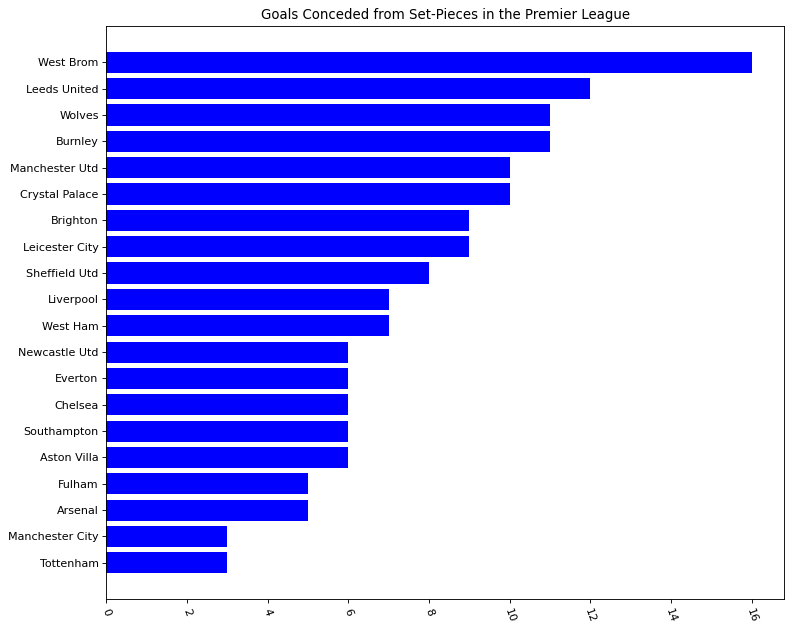

In [53]:

figure(figsize=(10, 8), dpi=80)

y =  sortedSetPieceDf["setPiece"]
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y*0.85, cmap = 'hsv')
plt.clf()
plt.barh(sortedSetPieceDf["Squad"],sortedSetPieceDf["setPiece"], color = "blue")
plt.xticks(rotation=290)
plt.title("Goals Conceded from Set-Pieces in the Premier League")
plt.show()

As we can see from the above plot, champions Manchester City have conceded the least number of goals from set pieces. On the other hand , West Brom, who finished 18th and relegated to the second division, have conceded the most number of goals.Teams on the top end of this bar chart have conceded a good portion of their goals just from set pieces.

## 2.2 Underperforming and Overperforming Goalkeepers

PSxG+/- -- Post-Shot Expected Goals minus Goals Allowed
Positive numbers suggest better luck or an above average ability to stop shots.
PSxG is expected goals based on how likely the goalkeeper is to save the shot
Note: Does not include own goals
xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted)

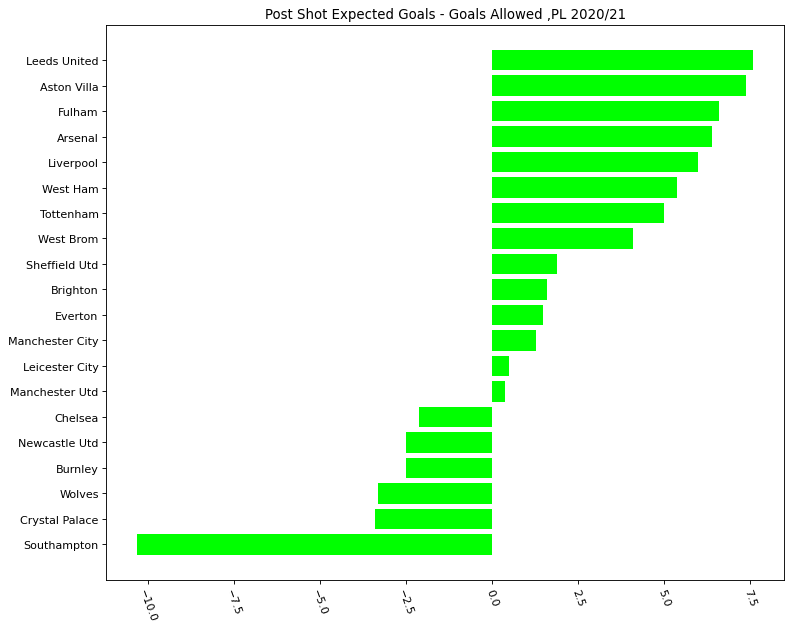

In [60]:
figure(figsize=(10, 8), dpi=80)
xGDF = sortedSetPieceDf.sort_values("PSxG+/-")
y =  xGDF["PSxG+/-"]
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.barh(xGDF["Squad"],xGDF["PSxG+/-"], color = "lime")
plt.xticks(rotation=290)
plt.title("Post Shot Expected Goals - Goals Allowed ,PL 2020/21")
plt.show()

As shown in the above plot , the goalkeepers of Leeds United , Aston Villa , Fulham and Arsenal have overperformed by 5 goals whereas the goalkeepers of Southampton have massively underperformed. Also, a majority of the teams who "overperformed" in this aspect are teams in the bottom half of the table. The reason is that teams higher up the table often have more attacking style of play and have to do less defending in the defensive third(the part of the pitch where a team defends its goal).

# 3.Shooting and its impacts on the performance of teams

The other most important aspect of football is shooting. Unless a team converts shots effectively into a goal, it is highly unlikely that the team will succeed throughout a 38-game season. We will look at the shooting stats of Premier League teams and select Premier League players to observe how impactful shooting is on the performance of teams by reading in a csv file that contains all the major shooting metrics for all the 20 teams in the 2020-21 season.

In [61]:
df = pd.read_csv("PL Shooting 2020-21 - Sheet1.csv")  # Read data into DataFrame
df

Squad  # Pl  90s  Gls   Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  \
0           Arsenal    29   38   53  455  141  31.0  11.97    3.71  0.10   
1       Aston Villa    24   38   52  518  179  34.6  13.63    4.71  0.09   
2          Brighton    27   38   39  476  129  27.1  12.53    3.39  0.07   
3           Burnley    25   38   32  383  125  32.6  10.08    3.29  0.08   
4           Chelsea    27   38   56  553  194  35.1  14.55    5.11  0.09   
5    Crystal Palace    24   38   39  346  129  37.3   9.11    3.39  0.10   
6           Everton    29   38   45  395  144  36.5  10.39    3.79  0.10   
7            Fulham    28   38   26  440  123  28.0  11.58    3.24  0.05   
8      Leeds United    23   38   60  524  196  37.4  13.79    5.16  0.11   
9    Leicester City    27   38   64  472  172  36.4  12.42    4.53  0.11   
10        Liverpool    28   38   65  600  201  33.5  15.79    5.29  0.10   
11  Manchester City    24   38   82  590  213  36.1  15.53    5.61  0.13   
12   Manchester Utd    29   38   70  517  197  38.1  13.61    5.18  0.12   
13    Newcastle Utd    27   38   44  387  130  33.6  10.18    3.42  0.10   
14    Sheffield Utd    27   38   19  319   92  28.8   8.39    2.42  0.05   
15      Southampton    29   38   47  417  157  37.6  10.97    4.13  0.10   
16        Tottenham    24   38   66  442  166  37.6  11.63    4.37  0.14   
17        West Brom    30   38   33  336  107  31.8   8.84    2.82  0.09   
18         West Ham    24   38   60  462  158  34.2  12.16    4.16  0.13   
19           Wolves    27   38   34  462  149  32.3  12.16    3.92  0.06   

    G/SoT  Dist  FK  PK  PKatt    xG  npxG  npxG/Sh  G-xG  np:G-xG  
0    0.33  16.9  23   6      6  53.5  49.0     0.11  -0.5     -2.0  
1    0.26  16.5  15   5      6  52.9  48.5     0.10  -0.9     -1.5  
2    0.26  16.6  14   6      9  51.6  44.8     0.10 -12.6    -11.8  
3    0.23  16.6  15   3      3  39.9  37.6     0.10  -7.9     -8.6  
4    0.25  16.3  16   8     10  64.0  56.4     0.10  -8.0     -8.4  
5    0.28  16.8  18   3      4  32.4  29.5     0.09   6.6      6.5  
6    0.28  16.4  15   4      5  47.1  43.4     0.11  -2.1     -2.4  
7    0.19  17.4  10   3      6  41.3  36.8     0.08 -15.3    -13.8  
8    0.29  16.2   9   4      4  57.5  54.5     0.11   2.5      1.5  
9    0.31  18.0  20  10     12  56.0  46.9     0.10   8.0      7.1  
10   0.29  16.2  20   6      6  72.6  68.1     0.12  -7.6     -9.1  
11   0.36  16.6  21   5      9  73.3  66.6     0.12   8.7     10.4  
12   0.30  17.3  21  10     11  60.2  51.9     0.10   9.8      8.1  
13   0.29  17.5  24   6      7  41.0  35.5     0.09   3.0      2.5  
14   0.17  16.8   5   3      4  31.4  28.4     0.09 -12.4    -12.4  
15   0.27  17.6  20   5      6  42.4  37.9     0.09   4.6      4.1  
16   0.37  17.2  35   5      5  54.5  50.7     0.12  11.5     10.3  
17   0.27  17.6  16   4      4  33.8  30.7     0.09  -0.8     -1.7  
18   0.37  15.4  16   2      4  53.9  50.7     0.11   6.1      7.3  
19   0.20  17.7  14   4      4  39.9  36.8     0.08  -5.9     -6.8

## 3.1 Shots on Target

The percentage of a team's shots on target is a great indicator of how likely it is to score goals and hence win games. We plot the percentage of shots on target out of total shots for each team in the league to observe how teams fared in this regard.

In [62]:
shotsDf = df[["Squad", "SoT"]]
sortedShotsDf = shotsDf.sort_values("SoT")

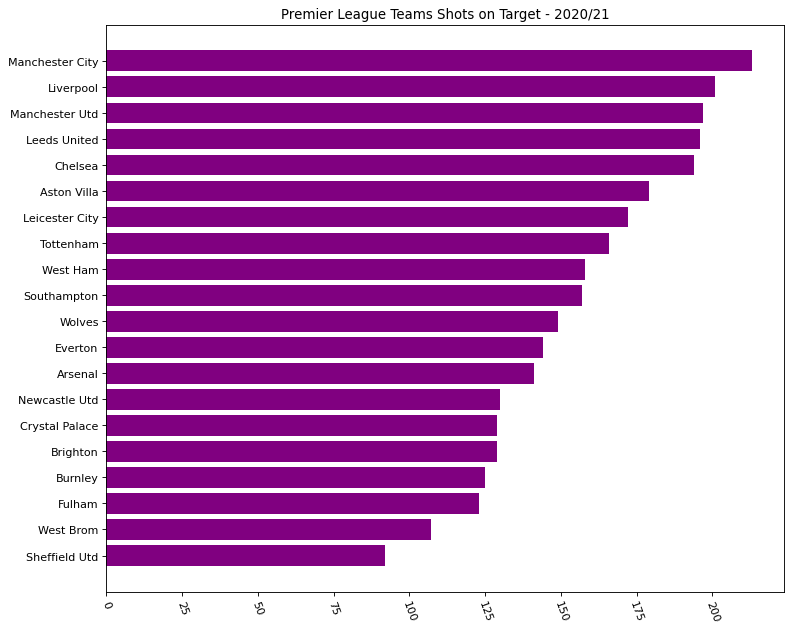

In [66]:

figure(figsize=(10, 8), dpi=80)

y = sortedShotsDf["SoT"]
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.barh(sortedShotsDf["Squad"],sortedShotsDf["SoT"], color = "purple")
plt.xticks(rotation=290)
plt.title("Premier League Teams Shots on Target - 2020/21")
plt.show()

From the above plot, we can see that shots on target is a very good indicator of where teams stand in the league. 4 of the top 6 teams in this category are also the teams that finished in the top 6 in the league , and the bottom half of this table is a reflection of the bottom half of the league table. Number of shots on target over a season is a very good indicator of performance because the number of games offsets the misrepresentation that would potentially have been caused by a small sample data or variance.

## 3.2 Elite Shooter In the Premier League

Let's have a look at the best shooters in the Premier League: Up first, the top-scorer , Mohamed Salah

The below program reads in a CSV file that contains all the event data for Mohamed Salah during the 2020-21 season. An event data dataset contains goals, assists, touches, fouls or any events that happen on the pitch minute by minute including the x and y coordinates of the event. This makes it possible to plot the activities of players on the pitch. Using Mohamed Salah's event data , we will investigate which part of the pitch Salah most scores from.

In [67]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv("plEventsData_Mohamed Salah.csv")  # Read data into DataFrame
df



h = df.loc[df["isGoal"] == True, ["name","type_displayName","x","y","endX","endY"]]
#x.set_index([pd.Index(range(len(x)))])
z= h.set_index(pd.Index(range(len(h))))
z

name type_displayName     x     y  endX  endY
0   Mohamed Salah             Goal  88.5  50.0   NaN   NaN
1   Mohamed Salah             Goal  87.0  39.2   NaN   NaN
2   Mohamed Salah             Goal  88.5  50.0   NaN   NaN
3   Mohamed Salah             Goal  88.3  42.4   NaN   NaN
4   Mohamed Salah             Goal  85.4  44.9   NaN   NaN
5   Mohamed Salah             Goal  86.3  42.5   NaN   NaN
6   Mohamed Salah             Goal  88.5  50.0   NaN   NaN
7   Mohamed Salah             Goal  90.4  55.5   NaN   NaN
8   Mohamed Salah             Goal  88.5  50.0   NaN   NaN
9   Mohamed Salah             Goal  88.5  50.0   NaN   NaN
10  Mohamed Salah             Goal  84.5  54.5   NaN   NaN
11  Mohamed Salah             Goal  93.3  52.5   NaN   NaN
12  Mohamed Salah             Goal  78.6  29.9   NaN   NaN
13  Mohamed Salah             Goal  90.6  34.2   NaN   NaN
14  Mohamed Salah             Goal  91.6  44.9   NaN   NaN
15  Mohamed Salah             Goal  88.5  50.0   NaN   NaN
16  Mohamed Salah             Goal  86.1  42.5   NaN   NaN
17  Mohamed Salah             Goal  95.5  37.3   NaN   NaN
18  Mohamed Salah             Goal  90.2  41.9   NaN   NaN
19  Mohamed Salah             Goal  95.2  46.0   NaN   NaN
20  Mohamed Salah             Goal  81.3  35.0   NaN   NaN
21  Mohamed Salah             Goal  91.3  38.6   NaN   NaN

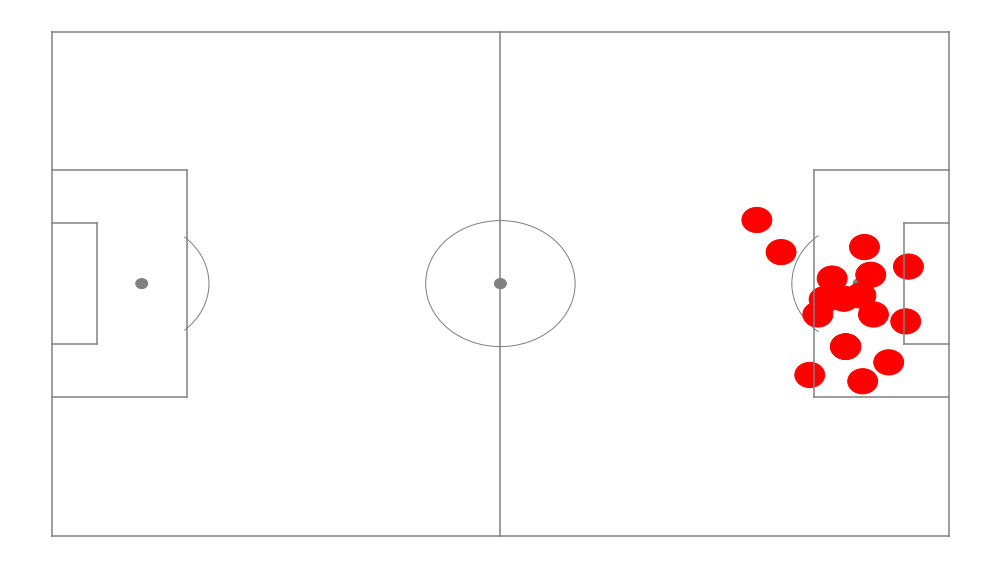

In [68]:
#Make a shot map and a pass map using Statsbomb data
#Set match id in match_id_required.

#Function to draw the pitch

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

    
#Draw the pitch

(fig,ax) = createPitch(120,80,'yards','gray')

#Plot the shots
for i in range(len(z)):
    x=z['x'][i]*1.2 #draw and calibrate the data collected against the pitch size
    y=z['y'][i]

    circleSize=2


    shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
    ax.add_patch(shotCircle)
     
fig.set_size_inches(14, 8)

plt.show()




As we can see from the above plot, Mohamed Salah scores a lot of his goals from inside the box, and around the arc outside it. Next , we plot Mohamed Salah's attacking percentile statistics to compare him with other forwards.

In [71]:
df = pd.read_csv("Mohamed Salah Scouting Report - Sheet1.csv")  # Read data into DataFrame

In [90]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

In [73]:
params = df["tatistic"].tolist()
values = df["Percentile"].tolist()

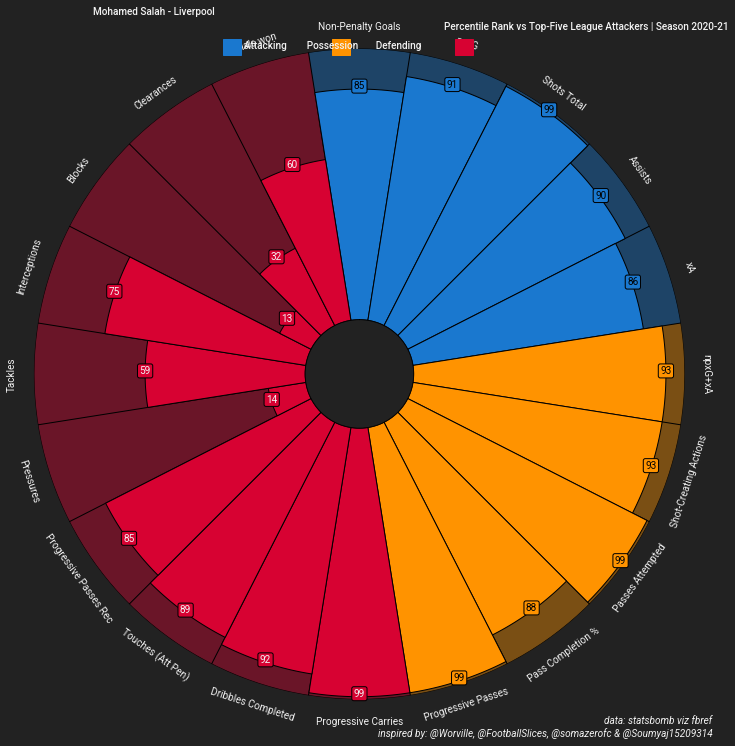

In [96]:

# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 10
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.215, 0.975, "Mohamed Salah - Liverpool", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.815, 0.955,
    "Percentile Rank vs Top-Five League Attackers | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.93, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

plt.show()

As we can see here , Mohamed Salah ranks in the 99th percentile for expected goals, progressive passing and shooting.
Having a striker of this quality has helped his team Liverpool finish in 4th place despite having a below-par defensive record.

# 4. Passing and its value in the Premier League

Passing the ball is a key part of association football. The purpose of passing is to keep possession of the ball by maneuvering it on the ground between different players with the objective of advancing it up the playing field. Let us observe the trend for passing in the Premier League in the 2021-22 season:

## 4.1 Pass Completion/Success

Pass completion is key to create chances and not concede chances. It also helps teams take control of the game. Let us look at the pass completion stats for teams in the Premier League.

In [97]:
df = pd.read_csv("PL Passing - Sheet1.csv")  # Read data into DataFrame
df

Squad  # Pl  90s   Cmp▼    Att  Cmp%  TotDist  PrgDist   Cmp  \
0   Manchester City    24   38  23578  26689  88.3   442810   115350  9849   
1           Chelsea    27   38  21646  25151  86.1   408322   115504  8896   
2         Liverpool    28   38  21527  25527  84.3   421366   125570  8395   
3    Manchester Utd    29   38  18495  21960  84.2   343759   103853  8082   
4           Arsenal    29   38  17802  21291  83.6   341180    93564  7057   
5    Leicester City    27   38  16726  20572  81.3   316778    96218  6923   
6         Tottenham    24   38  16142  19871  81.2   308661    97611  6803   
7      Leeds United    23   38  15996  20042  79.8   318521   104029  6052   
8          Brighton    27   38  15598  19456  80.2   316711    97708  5744   
9            Wolves    27   38  15234  18662  81.6   304634    93806  5944   
10           Fulham    28   38  15183  18859  80.5   303251    96436  5675   
11      Southampton    29   38  14758  18760  78.7   268855    88714  6542   
12          Everton    29   38  14670  18248  80.4   298495    98778  5538   
13      Aston Villa    24   38  12779  16556  77.2   263537    95235  4835   
14         West Ham    24   38  12533  16360  76.6   248445    89919  5241   
15    Sheffield Utd    27   38  12057  15847  76.1   236409    83837  5271   
16   Crystal Palace    24   38  11391  15090  75.5   214516    83423  5030   
17          Burnley    25   38  10644  15043  70.8   220877    86521  4419   
18    Newcastle Utd    27   38  10617  14220  74.7   216780    78025  4270   
19        West Brom    30   38   9741  13642  71.4   196109    76856  4030   

    Att.1  Cmp%.1  Cmp.1  Att.2  Cmp%.2  Cmp.2  Att.3  Cmp%.3  Ast    xA  \
0   10630    92.7  10407  11258    92.4   2957   3997    74.0   55  51.0   
1    9759    91.2   9751  10706    91.1   2665   3901    68.3   38  42.4   
2    9322    90.1   9732  10782    90.3   3072   4602    66.8   43  50.0   
3    8927    90.5   7765   8682    89.4   2316   3500    66.2   51  40.5   
4    7896    89.4   8102   8997    90.1   2374   3723    63.8   38  36.6   
5    7840    88.3   7382   8362    88.3   2163   3648    59.3   45  33.1   
6    7664    88.8   6812   7803    87.3   2224   3688    60.3   50  35.5   
7    6930    87.3   7236   8287    87.3   2454   4047    60.6   45  42.5   
8    6604    87.0   7143   8163    87.5   2475   4033    61.4   24  33.0   
9    6639    89.5   6524   7431    87.8   2502   3877    64.5   21  26.5   
10   6456    87.9   6921   7858    88.1   2312   3833    60.3   18  27.8   
11   7441    87.9   6331   7330    86.4   1593   3207    49.7   33  27.4   
12   6304    87.8   6477   7377    87.8   2372   3845    61.7   32  32.9   
13   5582    86.6   5510   6461    85.3   2174   3848    56.5   38  37.1   
14   6072    86.3   5056   6056    83.5   2006   3589    55.9   46  36.8   
15   6017    87.6   4718   5655    83.4   1830   3545    51.6   13  22.6   
16   5888    85.4   4484   5419    82.7   1578   3057    51.6   29  20.9   
17   5198    85.0   3913   4932    79.3   2038   4244    48.0   20  27.1   
18   4949    86.3   4306   5161    83.4   1836   3503    52.4   26  26.1   
19   4760    84.7   3854   4856    79.4   1633   3450    47.3   20  21.2   

    A-xA   KP   1/3  PPA  CrsPA  Prog  
0    4.0  439  1833  447     46  1633  
1   -4.4  443  1440  393     80  1528  
2   -7.0  444  1742  552     98  1914  
3   10.5  402  1364  397     65  1502  
4    1.4  323  1318  340     72  1340  
5   11.9  347  1164  304     64  1247  
6   14.5  307  1081  279     60  1181  
7    2.5  390  1111  372     87  1409  
8   -9.0  349  1084  381     91  1252  
9   -5.5  346  1031  216     80  1033  
10  -9.8  335   991  311    100  1141  
11   5.6  288   889  274     41  1087  
12  -0.9  297   968  261     68  1072  
13   0.9  398  1079  352     79  1236  
14   9.2  331   944  264    103   967  
15  -9.6  245   959  268     64   988  
16   8.1  248   781  244     59   974  
17  -7.1  267   881  283     84   943  
18  -0.1  272   69

In [98]:
passDf = df[["Squad","Cmp▼"]]
sortedPassDf = passDf.sort_values("Cmp▼", ascending = True)

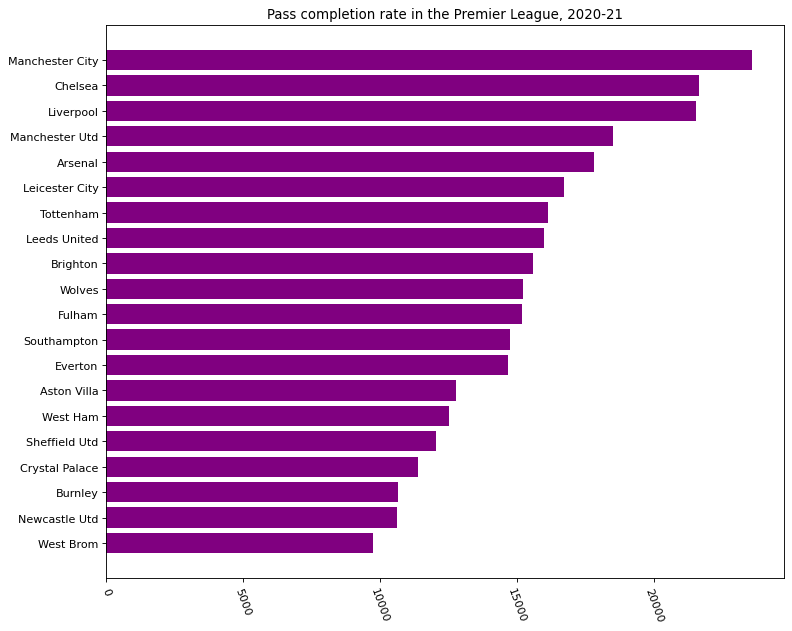

In [101]:
figure(figsize=(10, 8), dpi=80)

y = sortedPassDf ["Cmp▼"]
colors = cm.hsv(y / float(max(y)))
max(y)
plot = plt.scatter(y, y, c = 0.7*y, cmap = 'hsv')
plt.clf()
plt.barh(sortedPassDf ["Squad"],sortedPassDf ["Cmp▼"], color = "Purple")
plt.xticks(rotation=290)
plt.title("Pass completion rate in the Premier League, 2020-21")
plt.show()

As we can see again from the above plot, the pass completion rankings are very similar to the ending of season tables. Teams who finished on the top end have completed more than 15,000 passes on average and teams who finished at the bottom of the table have completed a lot fewer.

## 4.2 Directness of play

Directness of play describes how direct a team plays when trying to attack the opponent team. Teams vary in their styles of play, from very indirect to very direct. We can evaluate how direct Premier League Teams are and see if there is a relation between directness of play and success by looking at their statistics for progressive passes or the progressive distance the ball travels when opponents pass the ball around.Progressive Distance is the Total distance, in yards, that completed passes have traveled towards the opponent's goal. Note: Passes away from opponent's goal are counted as zero progressive yards. 

In [102]:
distDf = df[["Squad","PrgDist"]]
sortedDistDf = distDf.sort_values("PrgDist")

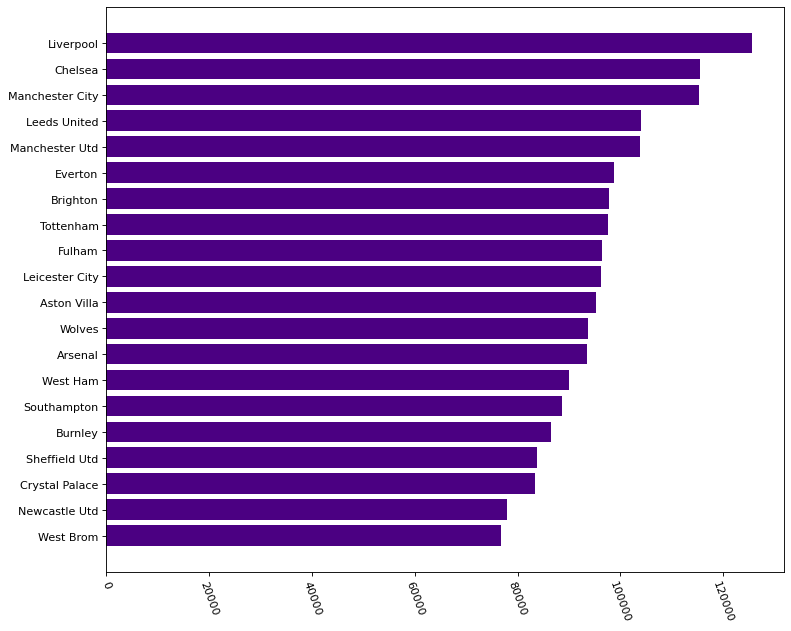

In [108]:
figure(figsize=(10, 8), dpi=80)

y = sortedDistDf ["PrgDist"]
colors = cm.hsv(y/float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.barh(sortedDistDf["Squad"],sortedDistDf ["PrgDist"], color = "indigo")
plt.xticks(rotation=290)
plt.show()

As we can see from the above plot, teams like Liverpool, Chelsea , Manchester United , Leeds United and Manchester City are more direct whereas teams like Burnley, Sheffield United , Crystal Palace , Newcastle United and West Brom are the least direct. This finding supports our hypothesis that more direct teams performed better in the league.

## 4.3 Best Passer in the Premier League

As Manchester City won the Premier League title for the 2020-21 season, it could be expected that the player who completed the most passes in the Premier League would be a Manchester City player. What is rather surprising is that Joao Cancelo is a Full-Back(Defender) who played for the entirety of the 2020-21 season either as a Left-Back or as a Right-Back for Manchester City. We will look at what sets him apart: How he compares to other players in the premier league and where he is active on the pitch.

In [109]:
df = pd.read_csv("plEventsData_João Cancelo.csv")  # Read data into DataFrame
df
h = df.loc[df['type_displayName'] == "Pass", ["name","type_displayName","x","y","endX","endY"]]
#x.set_index([pd.Index(range(len(x)))])
x= h.set_index(pd.Index(range(len(h))))
x

name type_displayName     x      y   endX   endY
0     João Cancelo             Pass  32.3   79.7    8.8   51.8
1     João Cancelo             Pass  35.0   59.0   28.8   45.4
2     João Cancelo             Pass  38.7   56.7   31.3   43.4
3     João Cancelo             Pass  44.3   56.4   42.1   22.4
4     João Cancelo             Pass  51.1   86.9   55.9   87.5
5     João Cancelo             Pass  67.2   78.4   72.9   76.0
6     João Cancelo             Pass  13.4   89.6   30.2   94.7
7     João Cancelo             Pass  35.3   98.1   24.2   88.6
8     João Cancelo             Pass  56.4   40.0   51.1   38.6
9     João Cancelo             Pass  80.7  100.0   79.7   93.6
10    João Cancelo             Pass  95.7   77.2   96.6   63.7
11    João Cancelo             Pass  21.5   44.3   25.6   21.8
12    João Cancelo             Pass  37.1   41.9   43.8   64.3
13    João Cancelo             Pass  58.1   73.6   69.4   96.2
14    João Cancelo             Pass  67.6   82.3   73.5   80.5
15    João Cancelo             Pass  75.3   76.6   89.5   58.2
16    João Cancelo             Pass  70.0   54.9   75.1   50.4
17    João Cancelo             Pass  33.6   75.4   45.9   75.9
18    João Cancelo             Pass  95.1   79.0   89.1   64.2
19    João Cancelo             Pass  90.3   79.7   85.9   80.2
20    João Cancelo             Pass  45.9   73.8   72.8   92.4
21    João Cancelo             Pass  73.5   79.3  100.0   79.0
22    João Cancelo             Pass  58.2   84.5   72.6   53.6
23    João Cancelo             Pass  34.6   67.9   27.8   40.3
24    João Cancelo             Pass  96.9   74.4   88.6    0.0
25    João Cancelo             Pass  55.0   76.0   46.4   67.0
26    João Cancelo             Pass  45.0   47.5   42.5   34.0
27    João Cancelo             Pass  68.5   77.9   71.0   71.8
28    João Cancelo             Pass  53.9   45.8   57.5   39.8
29    João Cancelo             Pass  71.4   45.8   76.4   34.5
30    João Cancelo             Pass  76.0   22.1   96.6   29.5
31    João Cancelo             Pass  35.3   43.3   43.7   46.6
32    João Cancelo             Pass  73.7   19.7   69.0   45.8
33    João Cancelo             Pass  20.7   11.4   28.6    0.0
34    João Cancelo             Pass  35.2   35.7   27.2   18.6
35    João Cancelo             Pass  27.7   53.4   35.4   53.9
36    João Cancelo             Pass  32.7   40.0   31.8   51.9
37    João Cancelo             Pass  42.4   30.9   66.1   28.5
38    João Cancelo             Pass  10.7    3.1   36.6   41.5
39    João Cancelo             Pass  47.6    0.0   38.0    8.1
40    João Cancelo             Pass  75.3   25.5   85.7   22.2
41    João Cancelo             Pass  79.3   29.5   72.8   28.6
42    João Cancelo             Pass  84.1   27.4   85.7   27.1
43    João Cancelo             Pass  94.2   20.3   88.1   20.4
44    João Cancelo             Pass  33.0   51.3   31.8   21.8
45    João Cancelo             Pass  53.3   44.0   55.4   47.6
46    João Cancelo             Pass  15.4   25.0   24.2   15.3
47    João Cancelo             Pass  14.8   13.1   34.1   22.4
48    João Cancelo             Pass  35.9   46.0   33.4   58.8
49    João Cancelo             Pass  41.9   49.6   36.4   51.8
50    João Cancelo             Pass  89.4   22.4   95.4   54.5
51    João Cancelo             Pass  26.6   22.1   42.0   32.5
52    João Cancelo             Pass  72.2   45.4   82.3   22.1
53    João Cancelo             Pass  59.5   28.2   58.7   37.4
54    João Cancelo             Pass  57.5   31.2   46.3   33.3
55    João Cancelo             Pass  61.2   22.4   64.1   34.8
56    João Cancelo             Pass  81.3   33.3   89.6   27.6
57    João Cancelo             Pass  63.9   20.7   81.9    7.9
58    João Cancelo             Pass  63.9   43.3   66.1   58.4
59    João Cancelo             Pass  80.1   17.3   80.0    9.1
60    João Cancelo             Pass  92.4   17.1   96.8   46.1
61    João Cancelo             Pass  65.6   31.8   64.9   38.8
62    João Cancelo             Pass  31.2   2

In [111]:



# load a custom font from google fonts
fm = FontManager('https://github.com/google/fonts/blob/main/ofl/sedgwickave/'
                 'SedgwickAve-Regular.ttf?raw=true')

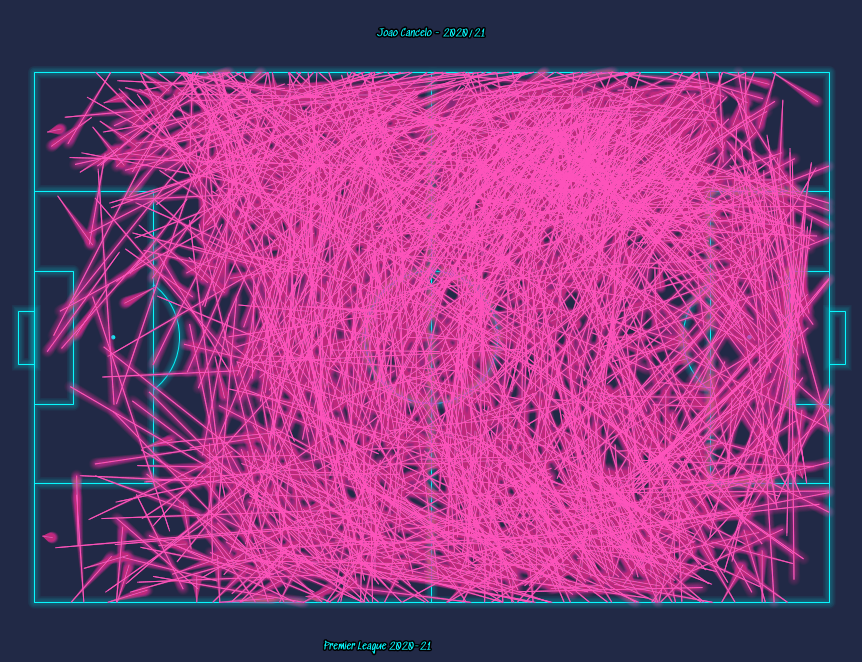

In [112]:
LINEWIDTH = 1  # starting linewidth
DIFF_LINEWIDTH = 1.2  # amount the glow linewidth increases each loop
NUM_GLOW_LINES = 10  # the amount of loops, if you increase the glow will be wider

# in each loop, for the glow, we plot the alpha divided by the num_glow_lines
# I have a lower alpha_pass_line value as there is a slight overlap in
# the pass comet lines when using capstyle='round'
ALPHA_PITCH_LINE = 0.3
ALPHA_PASS_LINE = 0.15

# The colors are borrowed from mplcyberpunk. Try some of the following alternatives
# '#08F7FE' (teal/cyan), '#FE53BB' (pink), '#F5D300' (yellow),
# '#00ff41' (matrix green), 'r' (red), '#9467bd' (viloet)
BACKGROUND_COLOR = '#212946'
PASS_COLOR = '#FE53BB'
LINE_COLOR = '#08F7FE'

# plot as initial pitch and the lines with alpha=1
# I have used grid to get a title and endnote axis automatically, but you could you pitch.draw()
pitch = Pitch(pitch_length=105, pitch_width=68,line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR, linewidth=LINEWIDTH,
              line_alpha=1, goal_alpha=1, goal_type='box')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
fig.set_facecolor(BACKGROUND_COLOR)
pitch.lines(x['x']*1.2,x["y"]*0.8,
            x["endX"]*1.2,x["endY"]*0.8,
            capstyle='butt',  # cut-off the line at the end-location.
            linewidth=LINEWIDTH, color=PASS_COLOR, comet=True, ax=ax['pitch'])

# plotting the titles and endnote
text_effects = [path_effects.Stroke(linewidth=3, foreground='black'),
                path_effects.Normal()]
ax['endnote'].text(0.5, 0.3, "Premier League 2020-21", va='center', path_effects=text_effects,
                   ha='right', color=LINE_COLOR, fontsize=60, fontproperties=fm.prop)
ax['title'].text(0.5, 0.3, "Joao Cancelo - 2020/21", path_effects=text_effects,
                 va='center', ha='center', color=LINE_COLOR, fontsize=190, fontproperties=fm.prop)

# plotting the glow effect. it is essentially a loop that plots the line with
# a low alpha (transparency) value and gradually increases the linewidth.
# This way the center will have more color than the outer area.
for i in range(1, NUM_GLOW_LINES + 1):
    pitch = Pitch(line_color=LINE_COLOR, pitch_color=BACKGROUND_COLOR,
                  linewidth=LINEWIDTH + (DIFF_LINEWIDTH * i),
                  line_alpha=ALPHA_PITCH_LINE / NUM_GLOW_LINES,
                  goal_alpha=ALPHA_PITCH_LINE / NUM_GLOW_LINES,
                  goal_type='box')
    pitch.draw(ax=ax['pitch'])  # we plot on-top of our previous axis from pitch.grid
    pitch.lines(x['x']*1.2, x["y"]*0.8,
                x["endX"]*1.2, x["endY"]*0.8,
                linewidth=LINEWIDTH + (DIFF_LINEWIDTH * i),
                capstyle='round',  # capstyle round so the glow extends past the line
                alpha=ALPHA_PASS_LINE / NUM_GLOW_LINES,
                color=PASS_COLOR, comet=True, ax=ax['pitch'])

As we can see from the above plot, Joao Cancelo was involved everywhere! This could be attributed to the fact that he plays multiple positions for Manchester City too! Next, we plot a comparison chart of where he ranks amongst the current very best :

In [113]:
import pandas as pd  # Import necessary libraries
df = pd.read_csv("Joao Cancelo Scouting Report - Sheet1.csv")  # Read data into DataFrame
df

Statistic  Per 90  Percentile
0        Non-Penalty Goals    0.09          85
1                     npxG     0.1          91
2              Shots Total    1.95          99
3                  Assists    0.21          90
4                       xA    0.16          86
5                  npxG+xA    0.26          93
6    Shot-Creating Actions    2.99          93
7         Passes Attempted    89.1          99
8        Pass Completion %  84.40%          88
9       Progressive Passes    7.59          99
10     Progressive Carries    9.26          99
11      Dribbles Completed    1.62          92
12       Touches (Att Pen)    2.85          89
13  Progressive Passes Rec    3.34          85
14               Pressures    9.93          14
15                 Tackles    2.32          59
16           Interceptions    2.18          75
17                  Blocks    1.39          13
18              Clearances    1.67          32
19             Aerials won    1.32          60

In [114]:
params = df["Statistic"].tolist()
params

['Non-Penalty Goals',
 'npxG',
 'Shots Total',
 'Assists',
 'xA',
 'npxG+xA',
 'Shot-Creating Actions',
 'Passes Attempted',
 'Pass Completion %',
 'Progressive Passes',
 'Progressive Carries',
 'Dribbles Completed',
 'Touches (Att Pen)',
 'Progressive Passes Rec',
 'Pressures',
 'Tackles',
 'Interceptions',
 'Blocks',
 'Clearances',
 'Aerials won']

In [115]:
values = df["Percentile"].tolist()
values

[85,
 91,
 99,
 90,
 86,
 93,
 93,
 99,
 88,
 99,
 99,
 92,
 89,
 85,
 14,
 59,
 75,
 13,
 32,
 60]

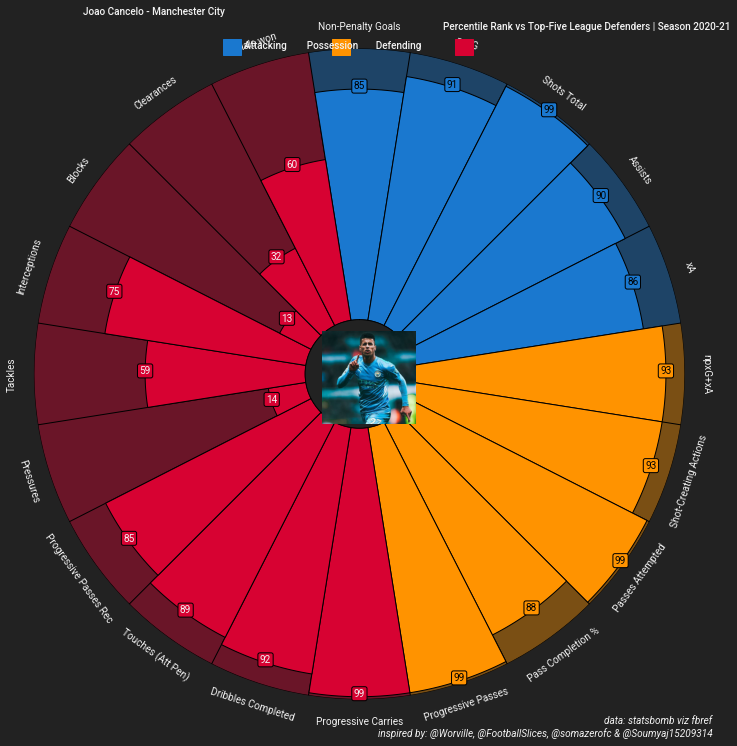

In [117]:
im = plt.imread('cancelo.jpeg')


# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 10
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 10

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values labels
)

# add title
fig.text(
    0.215, 0.975, "Joao Cancelo - Manchester City", size=16,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.815, 0.955,
    "Percentile Rank vs Top-Five League Defenders | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)

# add text
fig.text(
    0.34, 0.93, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    im, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

As we can see from the above plot, Joao Cancelo is one of the Best Full-Backs in the Premier League! He is in the 85th percentile for an overwhelming majority of the metrics!

# 5 Pressure

If there is any part of the Premier League that is evolving rapidly, it is how teams sustain pressure on their opponents. Pressing is a collective action that defines how, why, and when a team looks to close down en masse. This can be either to win the ball directly and counterattack off the back of it, or it can be to force the opponent to pass in a direction they want them to go.In the past few years, many teams have gone from defending in a low-block to defending in a mid or high block. Using FBRef,s Pressure data , we can look at where each team presses the most and which parts of the pitch yield in better results if pressed.

In [118]:
URL = 'https://fbref.com/en/share/q5sOt'   #get data via url
df = pd.read_html(URL)[0]  # Read data into DataFrame
# select a subset of the columns (Squad and pressure columns)
df = df[['Unnamed: 0_level_0', 'Pressures']].copy()
df.columns = df.columns.droplevel()  # drop the top-level of the multi-index

In [119]:
pressure_cols = ['Def 3rd', 'Mid 3rd', 'Att 3rd']
df_total = pd.DataFrame(df[pressure_cols].sum())
df_total.columns = ['total']
df_total = df_total.T
df_total = df_total.divide(df_total.sum(axis=1), axis=0) * 100

In [120]:
df[pressure_cols] = df[pressure_cols].divide(df[pressure_cols].sum(axis=1), axis=0) * 100.
df.sort_values(['Att 3rd', 'Def 3rd'], ascending=[True, False], inplace=True)

In [124]:

# a FontManager object for using a google font (default Robotto)
fm = FontManager()
# path effects
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

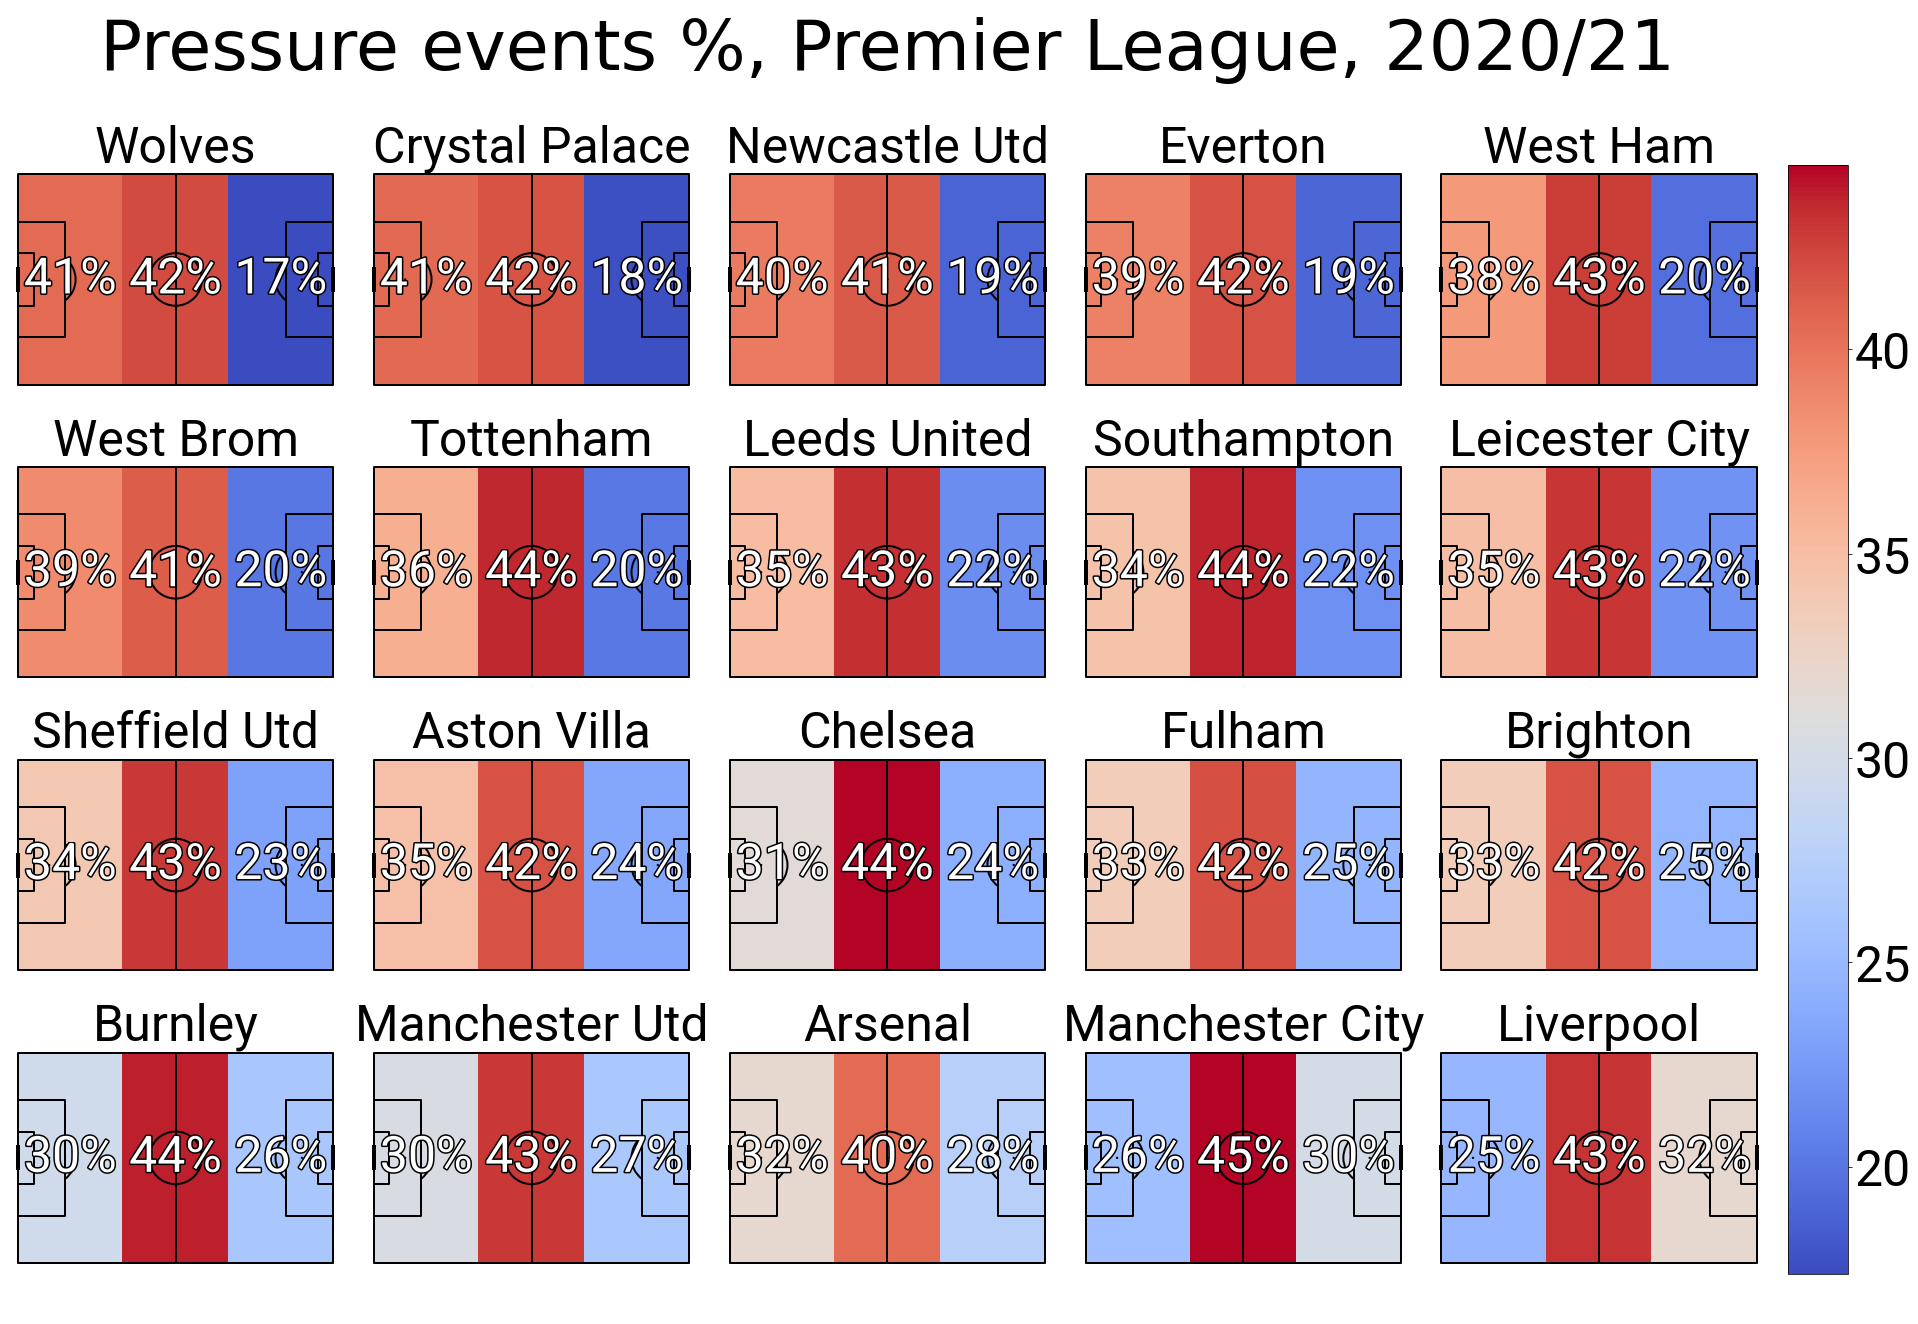

In [128]:
# setup a mplsoccer pitch
pitch = Pitch(line_zorder=2, line_color='black', pad_top=20)


bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))

GRID_HEIGHT = 0.8
CBAR_WIDTH = 0.03
fig, axs = pitch.grid(nrows=4, ncols=5, figheight=20,
                      # leaves some space on the right hand side for the colorbar
                      grid_width=0.88, left=0.025,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0.02, title_height=0.06, grid_height=GRID_HEIGHT)
fig.set_facecolor('white')

teams = df['Squad'].values
vmin = df[pressure_cols].min().min()  # we normalise the heatmaps with the min / max values
vmax = df[pressure_cols].max().max()
for i, ax in enumerate(axs['pitch'].flat[:len(teams)]):
    # the top of the StatsBomb pitch is zero
    # plot the title half way between zero and -20 (the top padding)
    ax.text(60, -10, teams[i],
            ha='center', va='center', fontsize=50, color="black",
            fontproperties=fm.prop)

    # fill in the bin statistics from df and plot the heatmap
    bin_statistic['statistic'] = df.loc[df.Squad == teams[i], pressure_cols].values
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='coolwarm', vmin=vmin, vmax=vmax)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontproperties=fm.prop,
                                   path_effects=path_eff, fontsize=50, ax=ax,
                                   str_format='{0:.0f}%', ha='center', va='center')


# add cbar axes
cbar_bottom = axs['pitch'][-1, 0].get_position().y0
cbar_left = axs['pitch'][0, -1].get_position().x1 + 0.01
ax_cbar = fig.add_axes((cbar_left, cbar_bottom, CBAR_WIDTH,
                        # take a little bit off the height because of padding
                        GRID_HEIGHT - 0.03))
cbar = plt.colorbar(heatmap, cax=ax_cbar)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(fm.prop)
    label.set_fontsize(50)

# title 
title = axs['title'].text(0.5, 0.5, 'Pressure events %, Premier League, 2020/21',
                          ha='center', va='center', fontsize=70, color = "black")

As we can see from the above plot, Champions Manchester City rank second in defending in a high-block(first third of the pitch) and first in defending in a mid-block.The other teams in the top 5 also have very similar pressing styles. Apart from West Ham and Tottenham, many of the teams that defended in low-blocks were bottom-half teams. Defending in low blocks means inviting pressure and more chance of conceding, and our plot supports that assumption.


In [137]:
pressureDict = {}   #Build A DOL then a DataFrame for each Area of the pitch
pressureDict["HighPress"] = ["Liverpool","Manchester City", "Arsenal ", "Manchester United", "Burnley",
                              "Brighton" ,"Fulham", "Chelsea"," Aston Villa", "Sheffield United"]
pressureDict["MidPress"] = ["Manchester City", "Burnley"," Chelsea", "Southampton", "Tottenham", "Sheffield United", "Manchester United", 
                            "Leicester City", "Liverpool","Leeds United"]
pressureDict["LowPress"] = ["Wolves", "Crystal palace" , "Newcastle United", "West Brom","Everton" , "West Ham" , "Tottenham", "Leeds United",
                            "Aston Villa" ,"Leicester City"]
pd.DataFrame(pressureDict)

HighPress           MidPress          LowPress
0          Liverpool    Manchester City            Wolves
1    Manchester City            Burnley    Crystal palace
2           Arsenal             Chelsea  Newcastle United
3  Manchester United        Southampton         West Brom
4            Burnley          Tottenham           Everton
5           Brighton   Sheffield United          West Ham
6             Fulham  Manchester United         Tottenham
7            Chelsea     Leicester City      Leeds United
8        Aston Villa          Liverpool       Aston Villa
9   Sheffield United       Leeds United    Leicester City

# Conclusion

In this study, we explored different datasets from different pages to evaluate which teams and players excelled in the Premier League in the 2020-21 season. From basic metrics that define performance into details that covered passing, shooting, pressing and discipline,goalkeeping and possession we created a hollistic picture of visualizations to show why the players who provide the most for their teams and which metrics determine the teams that will perform than their other counterparts. We observed that for a lot of our attacking and proactive defending metrics , Champions Manchester City and close runner-ups always excelled. As for reactive defending, teams that concede the most chances have bigger numbers. 
Particularly, we took a closer look at Joao Cancelo of Manchester City and Mohamed Salah of Liverpool and evaluated how they performed against other players. Plus, we observed that the underlying numbers also support the actual table position of Champions Manchester City and bottom three relegation victims Fulham, West Brom and Sheffield United.
Even though this is only a fraction of the available toolset to evaluate football performances using data, it gives a good overview and tells us which teams and players performed the best and the underlying reasons behind them.


### Reference

Datasets:1. https://www.kaggle.com/datasets/shushrutsharma/premier-league-event-data-202021
         2. https://fbref.com/en/ 
Documentations:
https://mplsoccer.readthedocs.io/en/latest/
https://fcpython.com/

### Authors: Dagmawi Zerihun and Zuyou Wang , May 7 2022